In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set(rc={'figure.figsize':(11.7,8.27)})

import gzip

In [2]:
acc_w_totals = pd.read_csv('../../accepted_2007_to_2018Q4.csv.gz',
                           compression='gzip',
                           header=0,
                           sep=',',
                           quotechar='"')
acc_w_totals

C:\Users\tdcho\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.00,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.00,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN

In [3]:
# we will remove those rows
rows_to_drop_id = list(acc_w_totals[acc_w_totals['id'].str.contains('Total|Loans', na=False)].index)
print('We will be dropping', len(rows_to_drop_id), 'rows')
print('\n')

acc = acc_w_totals.drop(rows_to_drop_id)
acc

We will be dropping 33 rows




,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.00,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.00,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN

In [4]:
acc.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.47

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '(8775.0,)'),
  Text(0.0, 0, '(500.0,)'),
  Text(50.0, 0, '(1975.0,)'),
  Text(100.0, 0, '(3225.0,)'),
  Text(150.0, 0, '(4475.0,)'),
  Text(200.0, 0, '(5725.0,)'),
  Text(250.0, 0, '(6975.0,)'),
  Text(300.0, 0, '(8225.0,)'),
  Text(350.0, 0, '(9475.0,)'),
  Text(400.0, 0, '')])

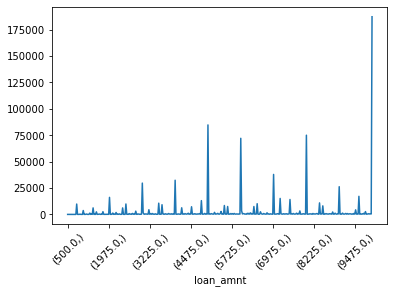

In [8]:
acc[acc['loan_amnt']<=10000][['loan_amnt']].value_counts().sort_index().plot()
plt.xticks(rotation=45)

In [9]:
acc[acc['loan_amnt']<=10000][['loan_amnt', 'total_pymnt', 'int_rate']]

,loan_amnt,total_pymnt,int_rate
0,3600.0,4421.723917,13.99
8,10000.0,10998.971575,6.49
9,8000.0,8939.580503,11.48
12,1400.0,1575.160698,12.88
15,9600.0,10636.098428,7.49
...,...,...,...
2260639,4500.0,5074.673110,14.49
2260641,4500.0,4570.604645,8.59
2260649,5000.0,5298.531020,21.49
2260651,10000.0,12612.352145,15.59


In [10]:
acc[acc['loan_amnt']>10000][['loan_amnt']]

,loan_amnt
1,24700.0
2,20000.0
3,35000.0
4,10400.0
5,11950.0
...,...
2260694,24000.0
2260695,24000.0
2260696,40000.0
2260697,24000.0


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(-50.0, 0, '(18775.0,)'),
  Text(0.0, 0, '(10025.0,)'),
  Text(50.0, 0, '(11275.0,)'),
  Text(100.0, 0, '(12525.0,)'),
  Text(150.0, 0, '(13775.0,)'),
  Text(200.0, 0, '(15025.0,)'),
  Text(250.0, 0, '(16275.0,)'),
  Text(300.0, 0, '(17525.0,)'),
  Text(350.0, 0, '(18775.0,)'),
  Text(400.0, 0, ''),
  Text(450.0, 0, '')])

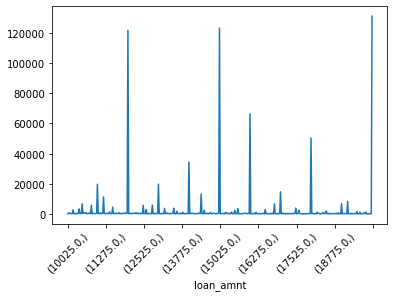

In [11]:
acc[(acc['loan_amnt']>10000) & (acc['loan_amnt']<=20000)][['loan_amnt']].value_counts().sort_index().plot()
plt.xticks(rotation=45)

In [12]:
acc[acc['loan_status'].str.contains('Fully Paid|Default', na=False)][['out_prncp']].value_counts()

out_prncp
0.00         1078739
8052.16            1
8502.11            1
8586.55            1
9032.08            1
9050.79            1
9321.75            1
11105.05           1
14185.71           1
14928.28           1
15838.02           1
16520.39           1
17881.12           1
20405.73           1
21999.94           1
22753.74           1
22991.22           1
25320.47           1
27009.42           1
8192.37            1
7369.59            1
468.01             1
6213.22            1
1117.14            1
1475.65            1
1647.71            1
1951.95            1
1990.99            1
2026.17            1
2274.99            1
2305.04            1
2786.98            1
2792.69            1
3226.84            1
3250.42            1
3376.73            1
3510.59            1
4857.56            1
5080.67            1
5311.24            1
28222.01           1
dtype: int64

### Checking if last_credit_pull_d is after or before the issue_d

In [13]:
acc['issue_d_dt'] = pd.DatetimeIndex(acc['issue_d'])
acc['last_credit_pull_d_dt'] = pd.DatetimeIndex(acc['last_credit_pull_d'])

acc[['issue_d_dt', 'last_credit_pull_d_dt']]

,issue_d_dt,last_credit_pull_d_dt
0,2015-12-01,2019-03-01
1,2015-12-01,2019-03-01
2,2015-12-01,2019-03-01
3,2015-12-01,2019-03-01
4,2015-12-01,2018-03-01
...,...,...
2260694,2016-10-01,2019-03-01
2260695,2016-10-01,2019-03-01
2260696,2016-10-01,2019-03-01
2260697,2016-10-01,2019-03-01


In [14]:
acc[acc['issue_d_dt']>acc['last_credit_pull_d_dt']][['issue_d_dt', 'last_credit_pull_d_dt']]

,issue_d_dt,last_credit_pull_d_dt
29589,2015-12-01,2015-11-01
34250,2015-12-01,2015-11-01
35928,2015-12-01,2015-11-01
35944,2015-12-01,2015-11-01
36147,2015-12-01,2015-11-01
...,...,...
2259460,2016-10-01,2016-09-01
2259810,2016-10-01,2016-09-01
2259921,2016-10-01,2016-09-01
2260396,2016-10-01,2016-09-01


### Checking if last_pymnt_d is after or before the issue_d

In [15]:
acc['last_pymnt_d_dt'] = pd.DatetimeIndex(acc['last_pymnt_d'])

acc[acc['issue_d_dt']>=acc['last_pymnt_d_dt']][['issue_d_dt', 'last_pymnt_d_dt']]

,issue_d_dt,last_pymnt_d_dt
9697,2015-12-01,2015-12-01
9751,2015-12-01,2015-12-01
10598,2015-12-01,2015-12-01
11137,2015-12-01,2015-12-01
11160,2015-12-01,2015-12-01
...,...,...
2259921,2016-10-01,2016-10-01
2260012,2016-10-01,2016-10-01
2260198,2016-10-01,2016-10-01
2260476,2016-10-01,2016-10-01


### Previewing the grades associated to see if there is any pattern

<AxesSubplot:xlabel='grade'>

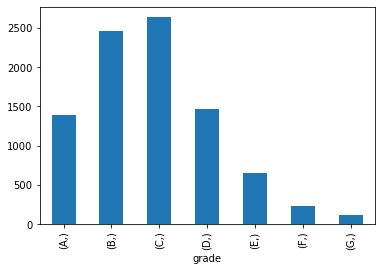

In [16]:
acc[acc['issue_d_dt']>=acc['last_pymnt_d_dt']][['grade']].value_counts().sort_index().plot(kind='bar')

### Checking if there is a diff between loan_amnt and funded_amnt

In [17]:
acc[acc['loan_amnt']>=acc['funded_amnt']][['loan_amnt', 'funded_amnt']]

,loan_amnt,funded_amnt
0,3600.0,3600.0
1,24700.0,24700.0
2,20000.0,20000.0
3,35000.0,35000.0
4,10400.0,10400.0
...,...,...
2260694,24000.0,24000.0
2260695,24000.0,24000.0
2260696,40000.0,40000.0
2260697,24000.0,24000.0


In [18]:
acc[acc['loan_amnt']>acc['funded_amnt']][['loan_amnt', 'funded_amnt']]

,loan_amnt,funded_amnt
684043,18000.0,10000.0
684121,20000.0,10000.0
684370,20000.0,10000.0
1611940,17500.0,8950.0
1611945,12500.0,8925.0
...,...,...
1939366,20000.0,13675.0
1939368,17500.0,16800.0
1939369,35000.0,22550.0
1939372,20000.0,12675.0


### diff between out_prncp vs funded_amnt

In [19]:
acc[acc['out_prncp']>=acc['funded_amnt']][['out_prncp', 'funded_amnt']]

,out_prncp,funded_amnt
1353978,30000.0,30000.0
1354296,20975.0,20975.0
1355614,14000.0,14000.0
1355836,20000.0,20000.0
1355961,32000.0,32000.0
...,...,...
1433698,40000.0,40000.0
1434953,8000.0,8000.0
1445045,15000.0,15000.0
1448644,7800.0,7800.0


In [20]:
acc[acc['out_prncp']<acc['funded_amnt']][['out_prncp', 'funded_amnt']]

,out_prncp,funded_amnt
0,0.00,3600.0
1,0.00,24700.0
2,0.00,20000.0
3,15897.65,35000.0
4,0.00,10400.0
...,...,...
2260694,14287.39,24000.0
2260695,13951.42,24000.0
2260696,23252.59,40000.0
2260697,0.00,24000.0


In [21]:
acc[acc['pymnt_plan']=='y'][['hardship_flag']].value_counts()

hardship_flag
Y                620
dtype: int64

# Question 1

# MUST REMOVE DATE AND DO GROUPBY WITH DATES

In [22]:
acc['issue_d']

0          Dec-2015
1          Dec-2015
2          Dec-2015
3          Dec-2015
4          Dec-2015
             ...   
2260694    Oct-2016
2260695    Oct-2016
2260696    Oct-2016
2260697    Oct-2016
2260698    Oct-2016
Name: issue_d, Length: 2260668, dtype: object

In [23]:
acc['year'] = pd.DatetimeIndex(acc['issue_d']).year
acc['year']

0          2015
1          2015
2          2015
3          2015
4          2015
           ... 
2260694    2016
2260695    2016
2260696    2016
2260697    2016
2260698    2016
Name: year, Length: 2260668, dtype: int64

In [24]:
acc[acc['year']==2015][['year']]

,year
0,2015
1,2015
2,2015
3,2015
4,2015
...,...
421090,2015
421091,2015
421092,2015
421093,2015


### Bullet 1

## Year vs Total Sum of Loan Amount

<AxesSubplot:xlabel='year'>

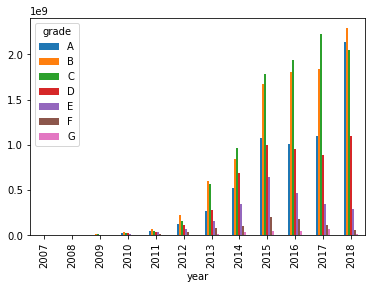

In [25]:
acc_question1 = acc[['purpose', 'loan_amnt', 'grade', 'sub_grade', 'issue_d', 'year']]

acc_question1.groupby(['year', 'grade'])['loan_amnt'].sum().unstack('grade').plot(kind='bar')

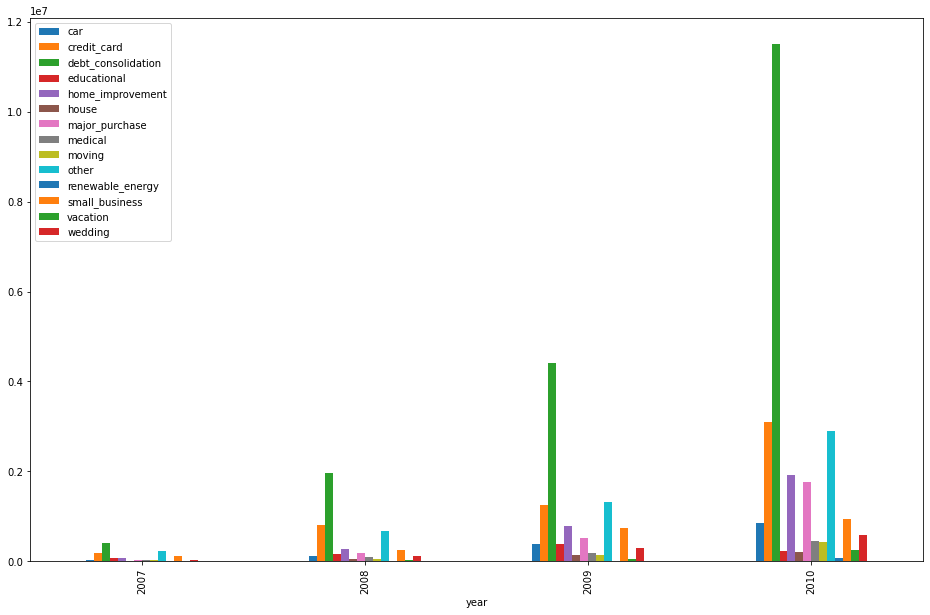

In [34]:
acc_question1[(acc_question1['year']==2007) | (acc_question1['year']==2008) |\
              (acc_question1['year']==2009) | (acc_question1['year']==2010)\
             ].groupby(['year', 'purpose'])['year'].sum().unstack('purpose').plot(kind='bar',
                                                                                  figsize=(16, 10))
plt.legend(loc=2)

## Year vs count of loans

<AxesSubplot:>

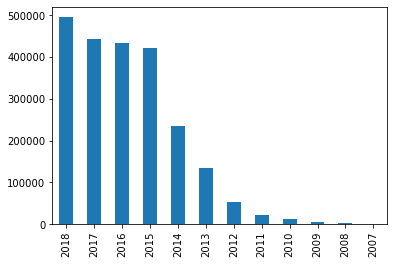

In [18]:
acc_question1['year'].value_counts().plot.bar()

### Bullet 2

In [19]:
acc['id'].count()

2260668

In [20]:
np.sum(acc_question1['loan_amnt'])

34016115925.0

In [21]:
acc_question1['purpose'].unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

### Bullet 3

In [22]:
acc_question1.purpose.value_counts()

debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: purpose, dtype: int64

# HOW TO SET ALPHABETICAL ORDER FOR THE GRAPH?

## Purpose vs Grade

<AxesSubplot:xlabel='purpose,purpose'>

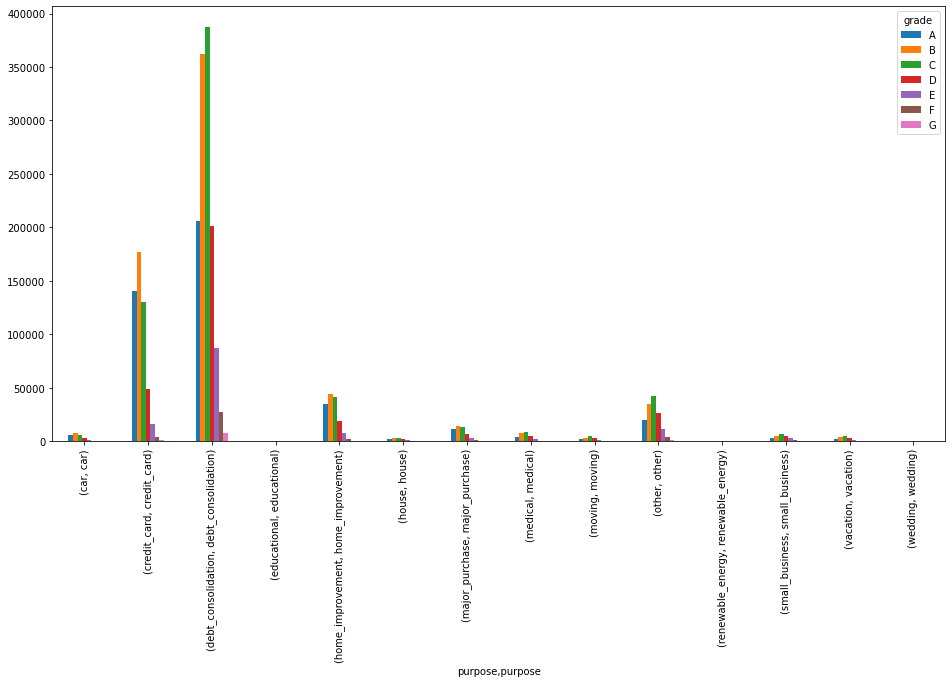

In [23]:
acc_question1.groupby(['purpose', 'grade'])['purpose'].value_counts().unstack('grade').plot(kind='bar', figsize=(16, 8))

## Purpose vs Subgrade

<AxesSubplot:xlabel='purpose,purpose'>

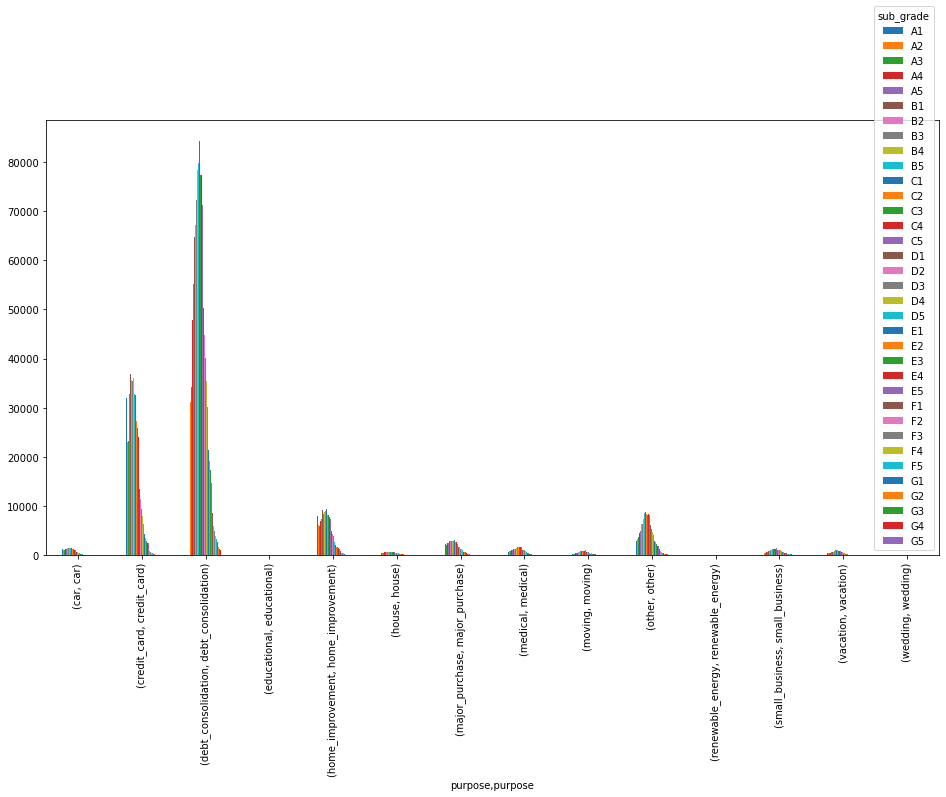

In [24]:
acc_question1.groupby(['purpose', 'sub_grade'])['purpose'].value_counts().unstack('sub_grade').plot(kind='bar', figsize=(16, 8))

In [25]:
acc['purpose'].value_counts(normalize=True)

debt_consolidation    0.565265
credit_card           0.228681
home_improvement      0.066554
other                 0.061681
major_purchase        0.022314
medical               0.012159
small_business        0.010921
car                   0.010622
vacation              0.006867
moving                0.006813
house                 0.006253
wedding               0.001042
renewable_energy      0.000639
educational           0.000188
Name: purpose, dtype: float64

In [26]:
acc[acc['grade']=='A']['purpose'].value_counts(normalize=True).sort_index()

car                   0.014239
credit_card           0.324479
debt_consolidation    0.475527
educational           0.000203
home_improvement      0.079736
house                 0.005956
major_purchase        0.026456
medical               0.010297
moving                0.004032
other                 0.045196
renewable_energy      0.000413
small_business        0.006843
vacation              0.005586
wedding               0.001037
Name: purpose, dtype: float64

### Bullet 4

<AxesSubplot:xlabel='year,year'>

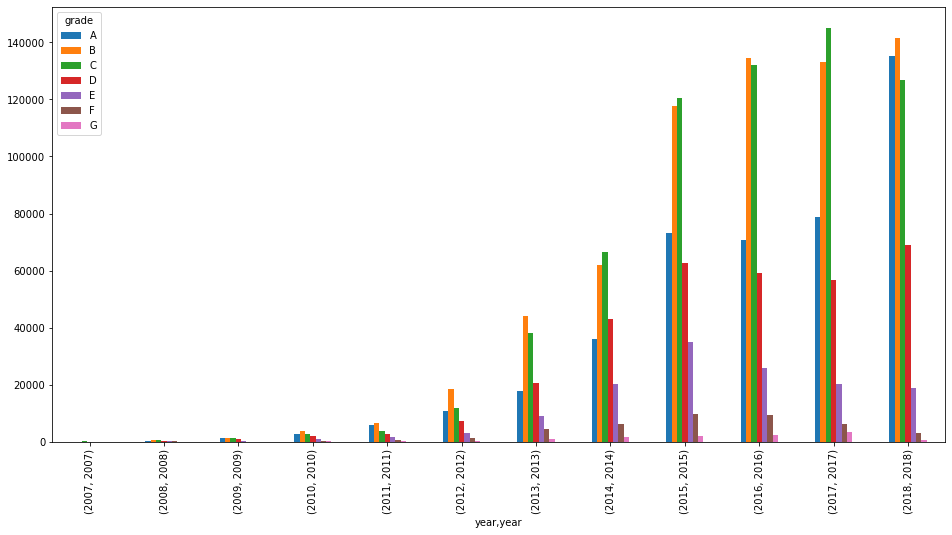

In [27]:
acc_question1.groupby(['year', 'grade'])['year'].value_counts().unstack('grade').plot(kind='bar', figsize=(16, 8))

2007


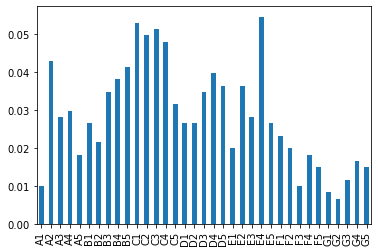

********************
2008


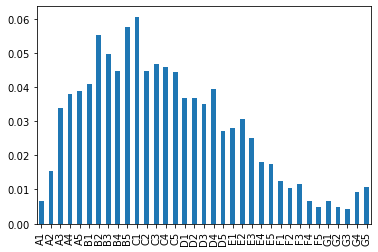

********************
2009


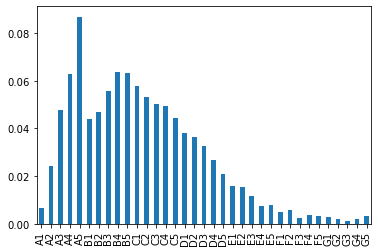

********************
2010


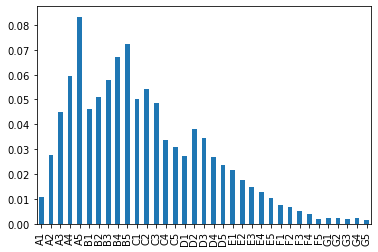

********************
2011


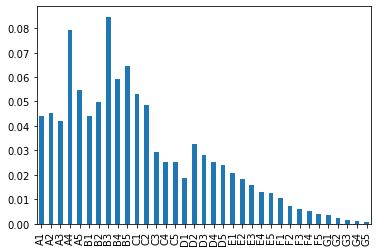

********************
2012


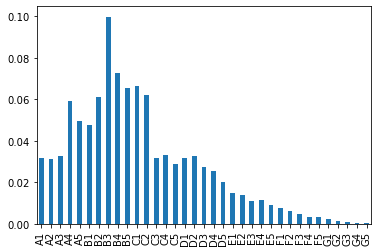

********************
2013


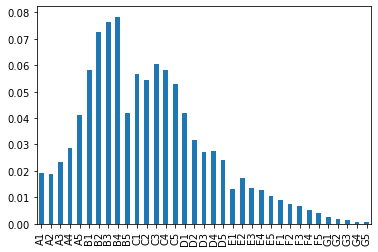

********************
2014


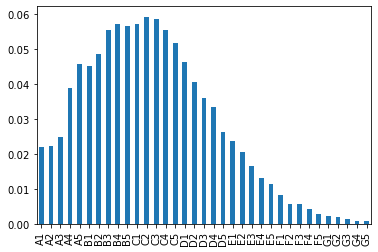

********************
2015


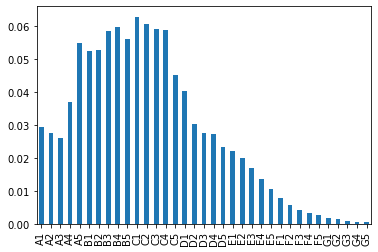

********************
2016


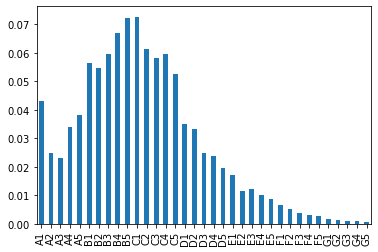

********************
2017


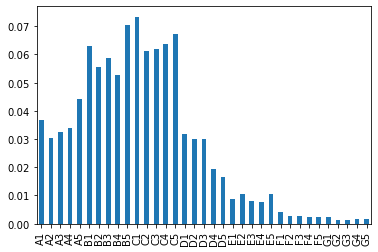

********************
2018


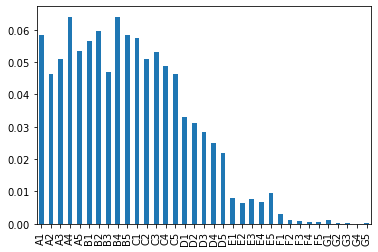

********************


In [28]:
acc_issueyear_list = sorted(list(acc_question1['year'].unique()))

for acc_year in acc_issueyear_list:
    print(acc_year)
    plt.figure()
    acc_question1[acc_question1['year']==acc_year]['sub_grade'].value_counts(normalize=True).sort_index().plot.bar()
    plt.show()
    print('*'*20)

### Bullet 5

2007


<Figure size 432x288 with 0 Axes>

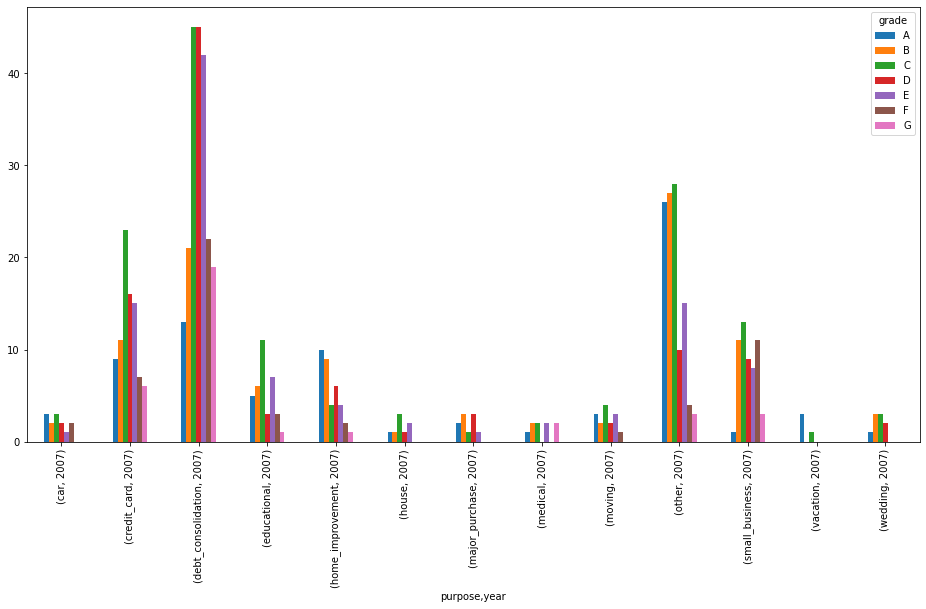

********************
2008


<Figure size 432x288 with 0 Axes>

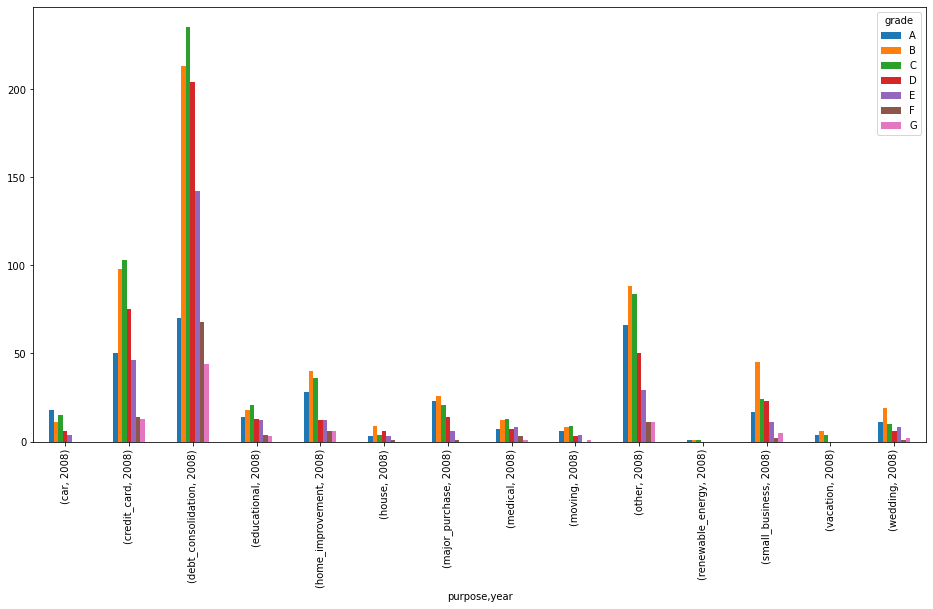

********************
2009


<Figure size 432x288 with 0 Axes>

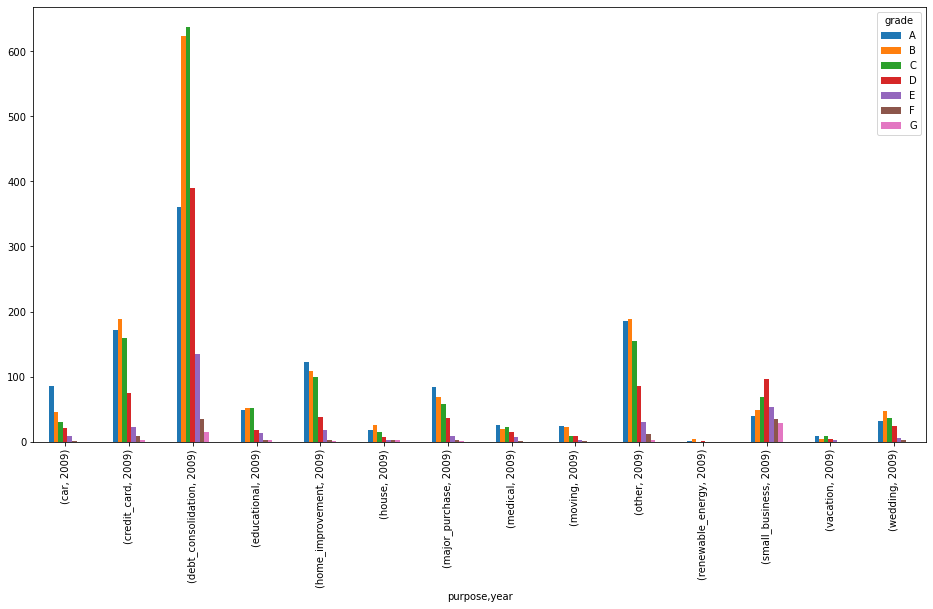

********************
2010


<Figure size 432x288 with 0 Axes>

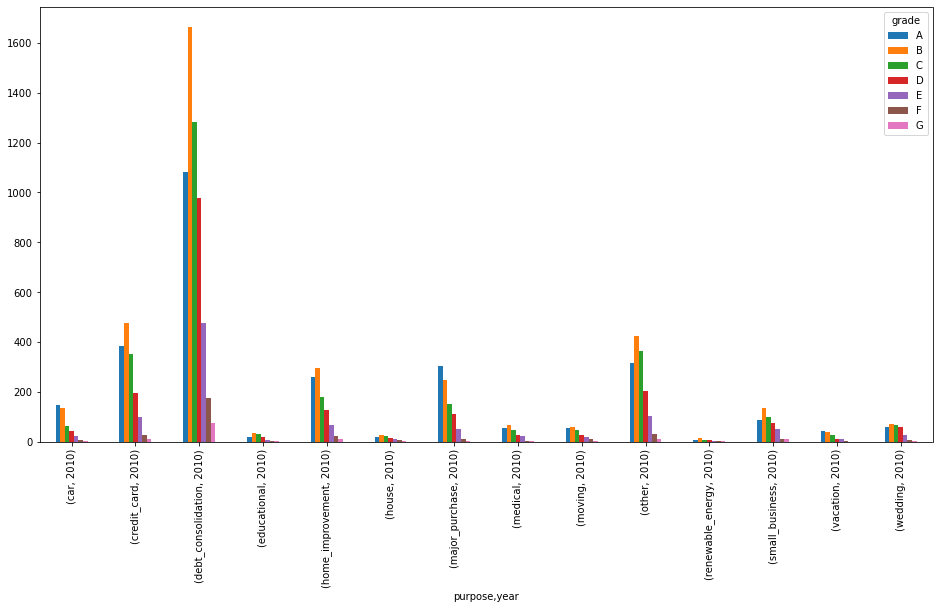

********************
2011


<Figure size 432x288 with 0 Axes>

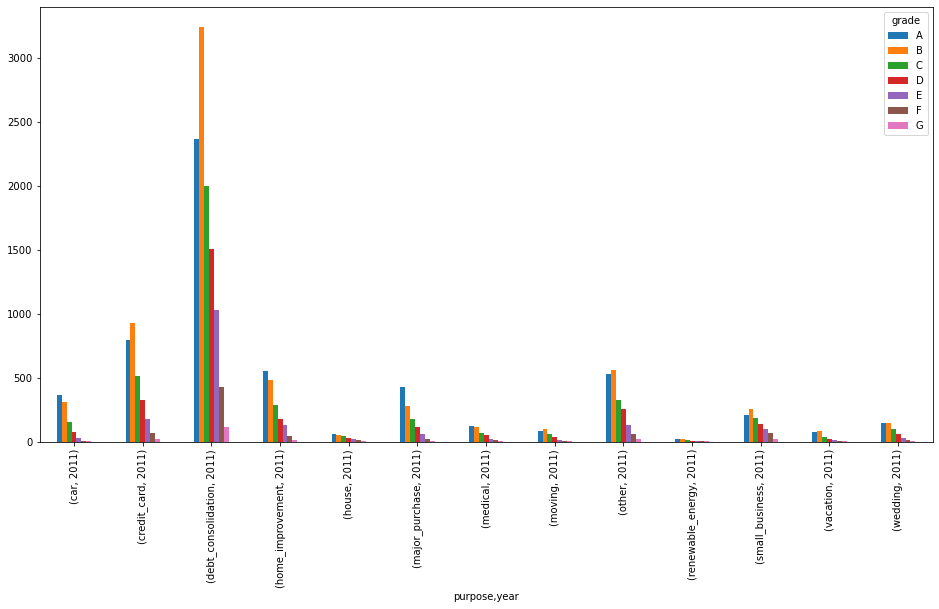

********************
2012


<Figure size 432x288 with 0 Axes>

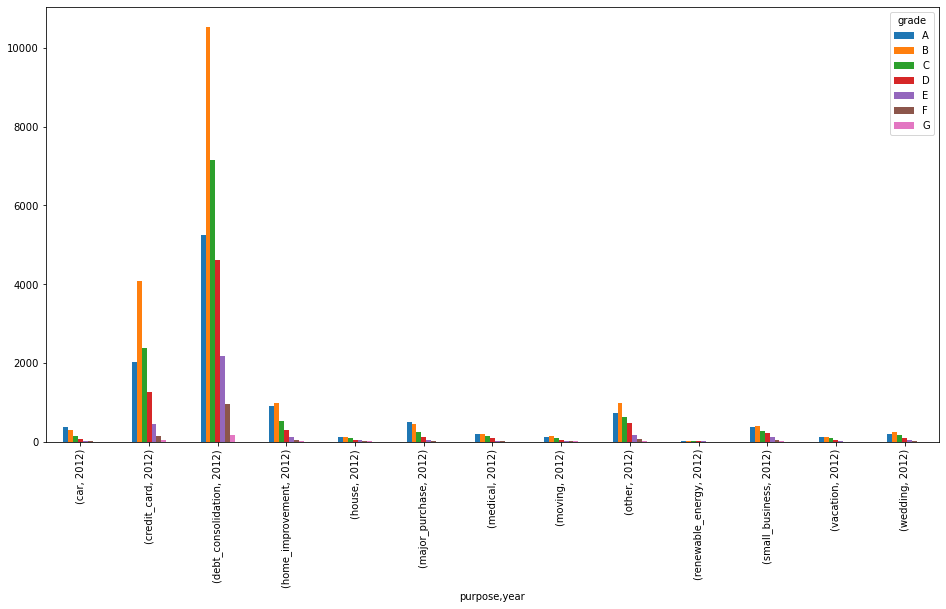

********************
2013


<Figure size 432x288 with 0 Axes>

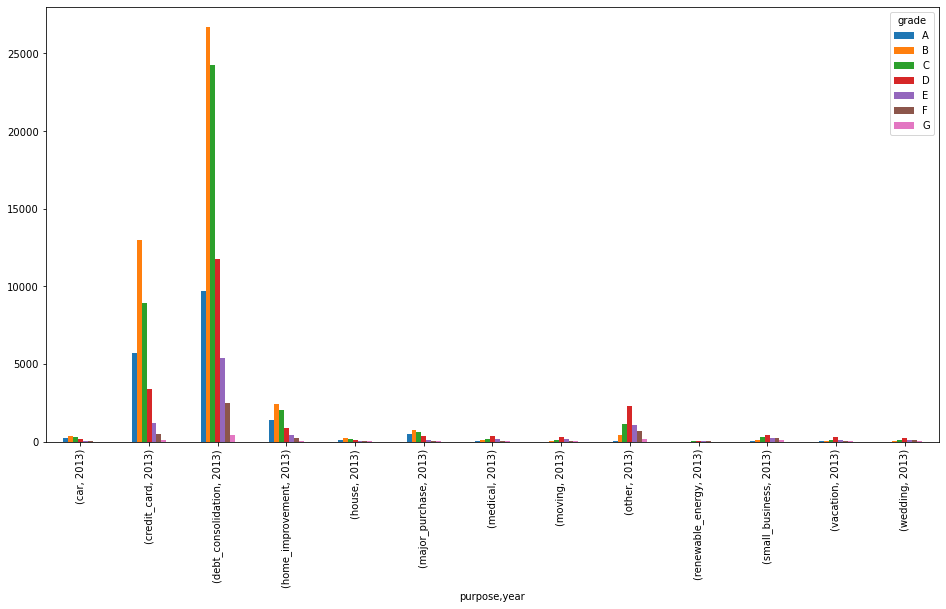

********************
2014


<Figure size 432x288 with 0 Axes>

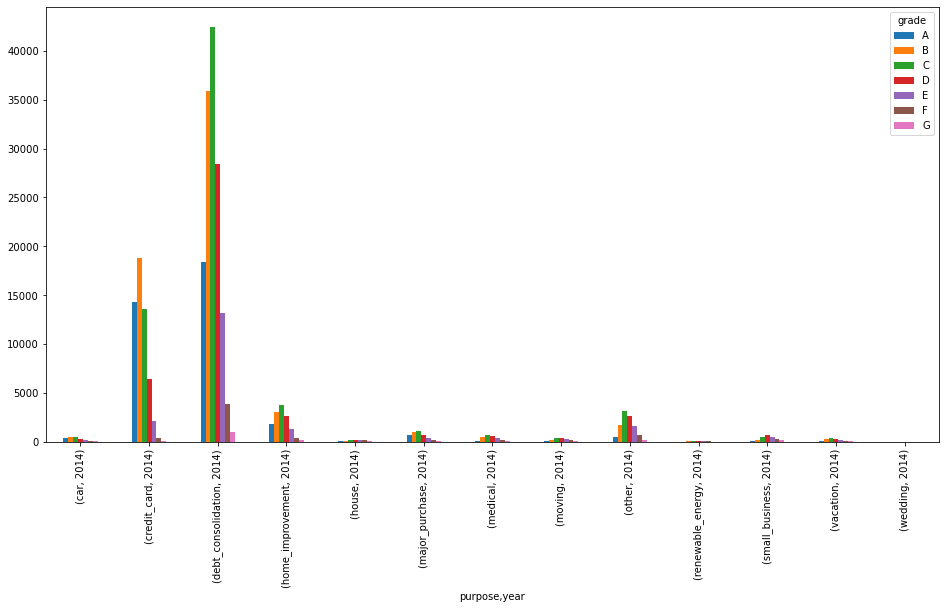

********************
2015


<Figure size 432x288 with 0 Axes>

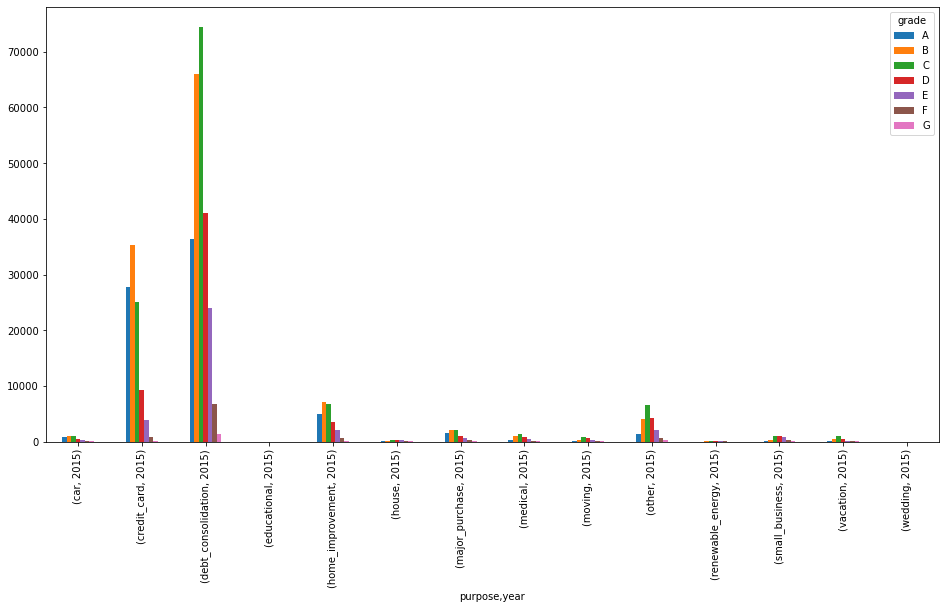

********************
2016


<Figure size 432x288 with 0 Axes>

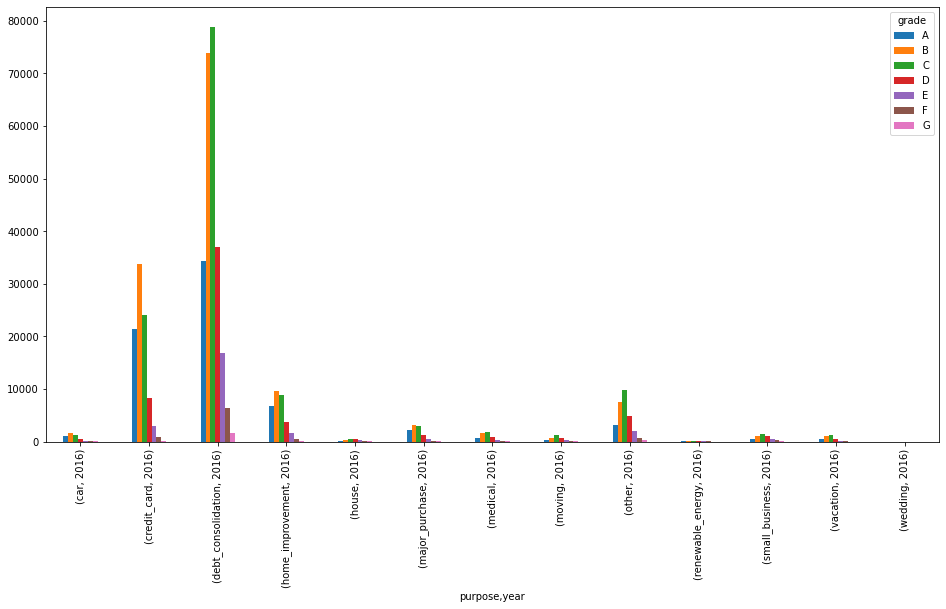

********************
2017


<Figure size 432x288 with 0 Axes>

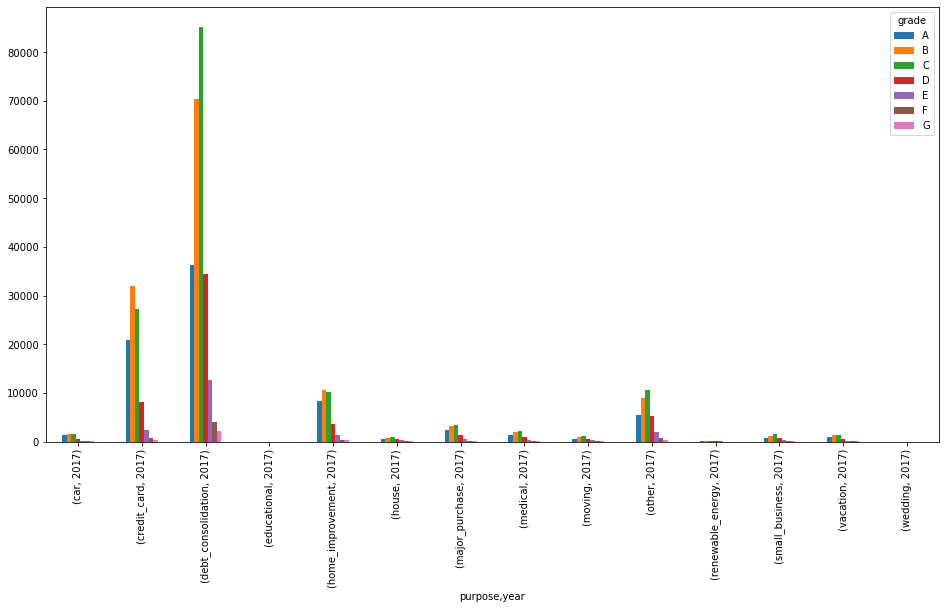

********************
2018


<Figure size 432x288 with 0 Axes>

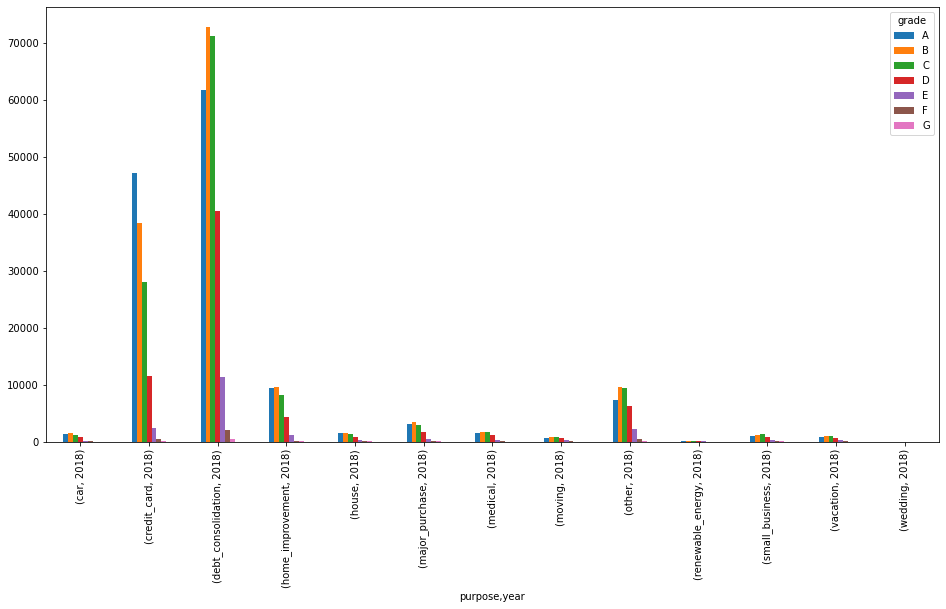

********************


In [29]:
acc_issueyear_list = sorted(list(acc_question1['year'].unique()))

for acc_year in acc_issueyear_list:
    print(acc_year)
    plt.figure()
    try:
        acc_question1[(acc_question1['year']==acc_year)].groupby(['purpose', 'year'])\
                      ['grade'].value_counts().unstack('grade').plot(kind='bar', figsize=(16, 8))
    except:
        pass
    plt.show()
    print('*'*20)

# Question 2

### Bullet 1

In [30]:
acc_question2 = acc[['loan_amnt', 'year', 'purpose', 'loan_status', 'funded_amnt', 'grade', 'sub_grade']]

In [31]:
acc_question2['loan_amnt'].value_counts().sort_index()

500.0         11
550.0          1
600.0          6
700.0          3
725.0          1
           ...  
39900.0       24
39925.0       14
39950.0       10
39975.0       11
40000.0    33368
Name: loan_amnt, Length: 1572, dtype: int64

### Bullet 2

<AxesSubplot:xlabel='loan_status,purpose'>

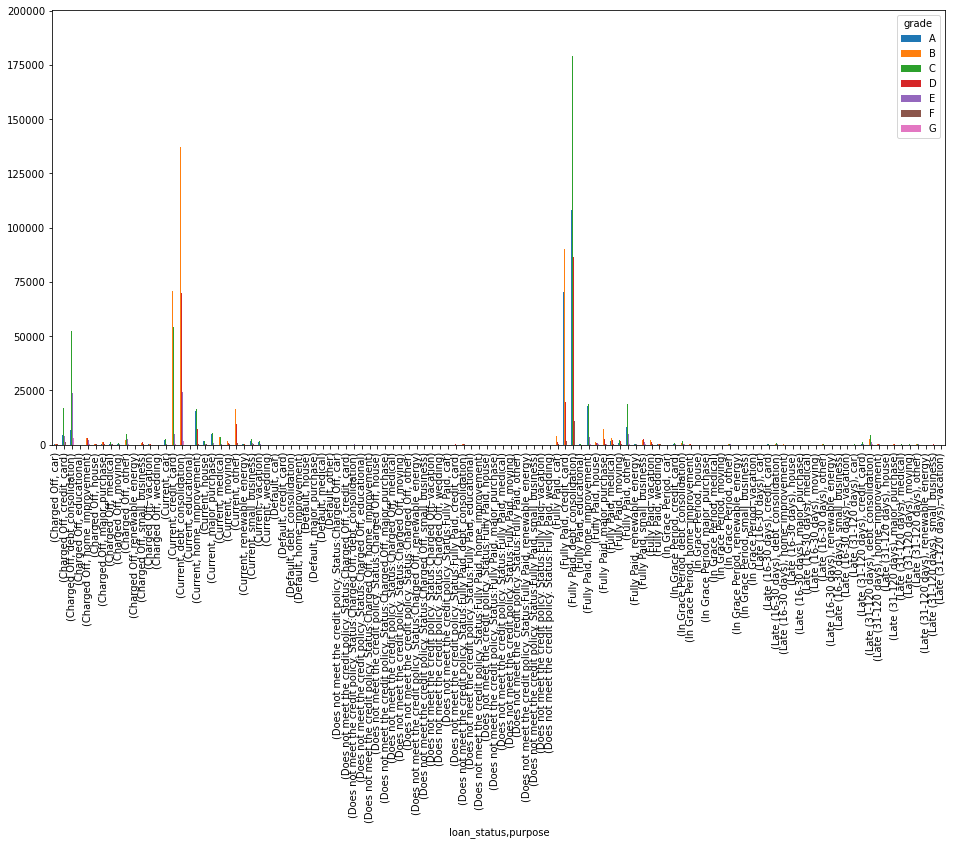

In [32]:
acc_question2.groupby(['loan_status', 'grade'])['purpose'].value_counts().unstack('grade').plot(kind='bar', figsize=(16, 8))

car


<Figure size 432x288 with 0 Axes>

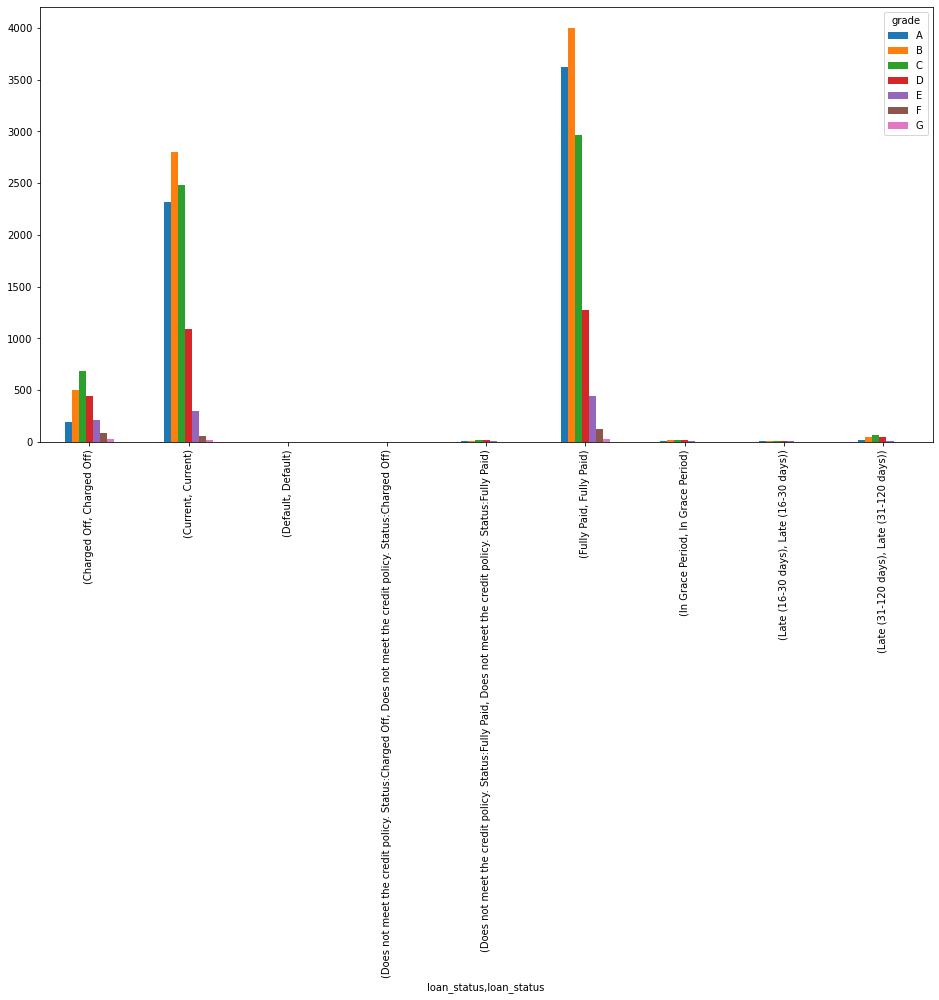

********************
credit_card


<Figure size 432x288 with 0 Axes>

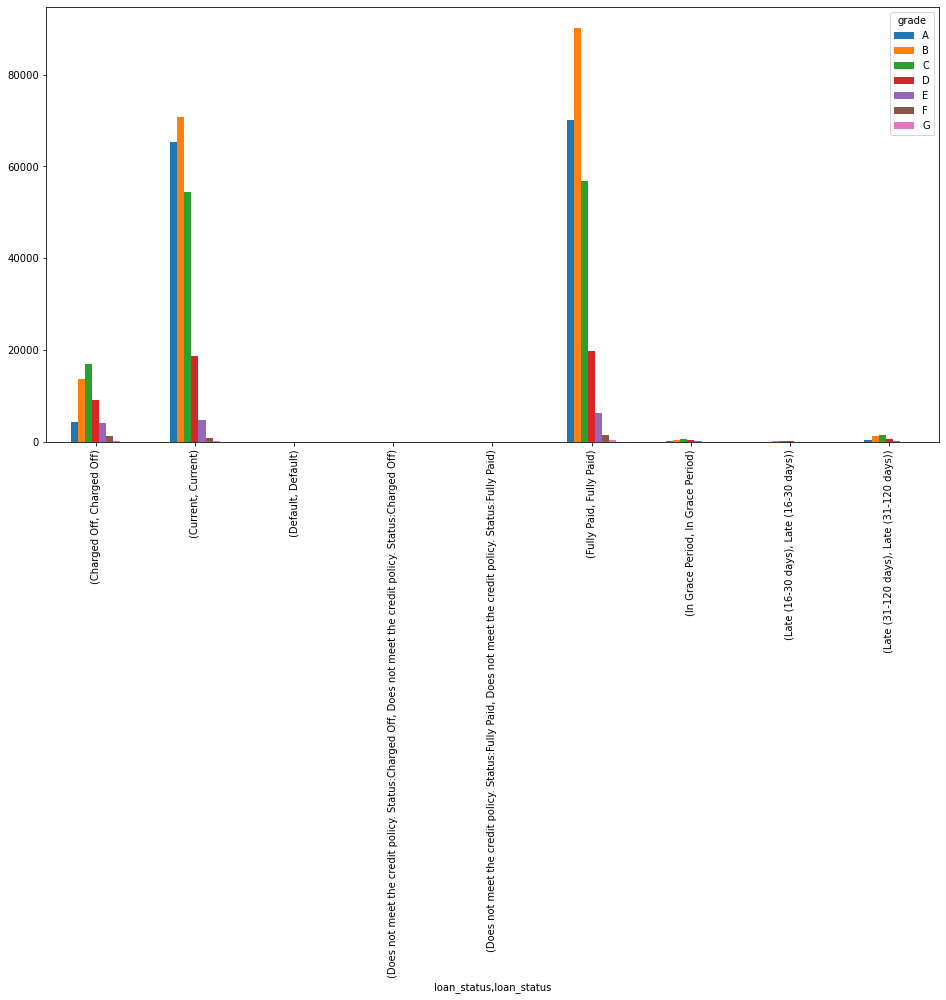

********************
debt_consolidation


<Figure size 432x288 with 0 Axes>

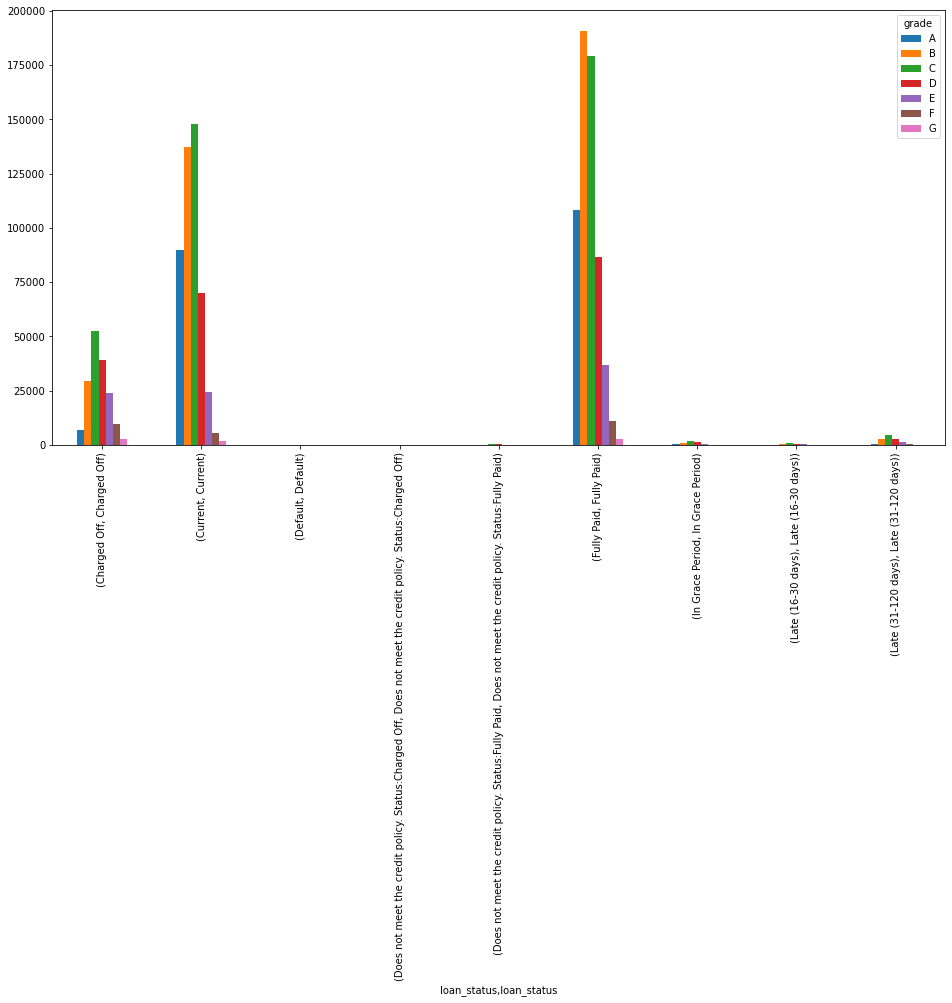

********************
educational


<Figure size 432x288 with 0 Axes>

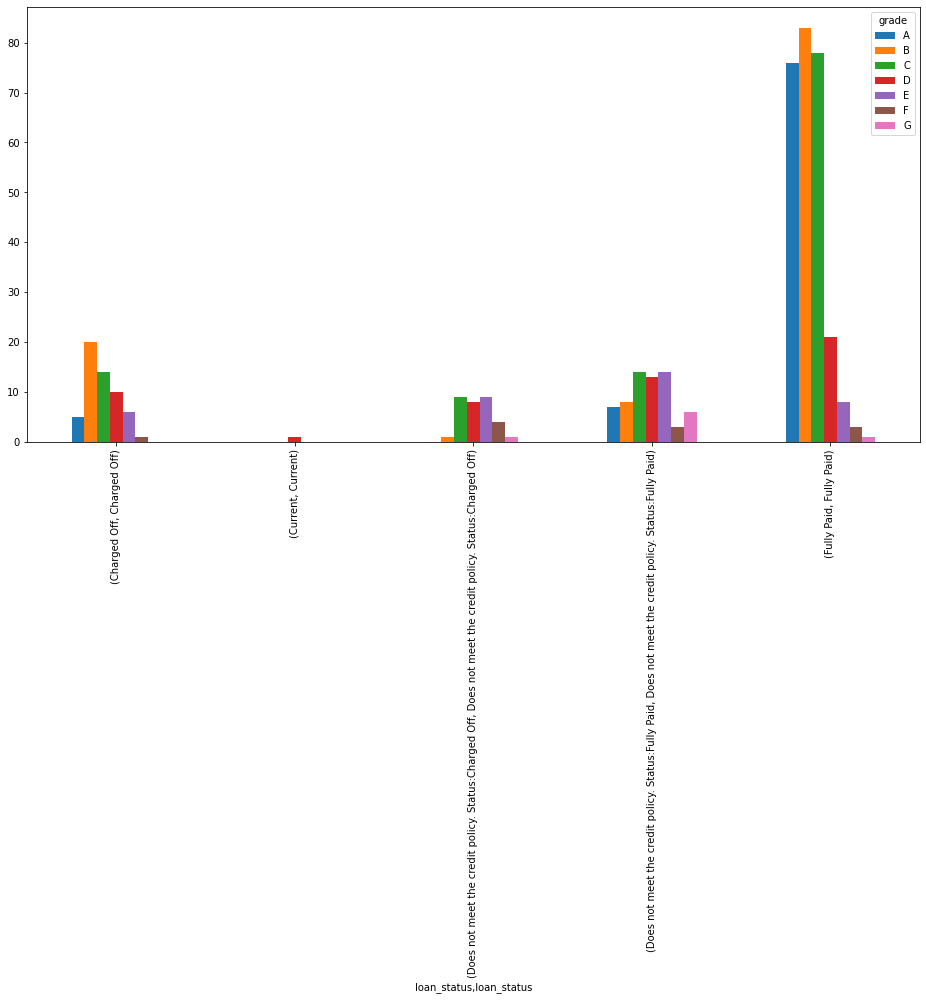

********************
home_improvement


<Figure size 432x288 with 0 Axes>

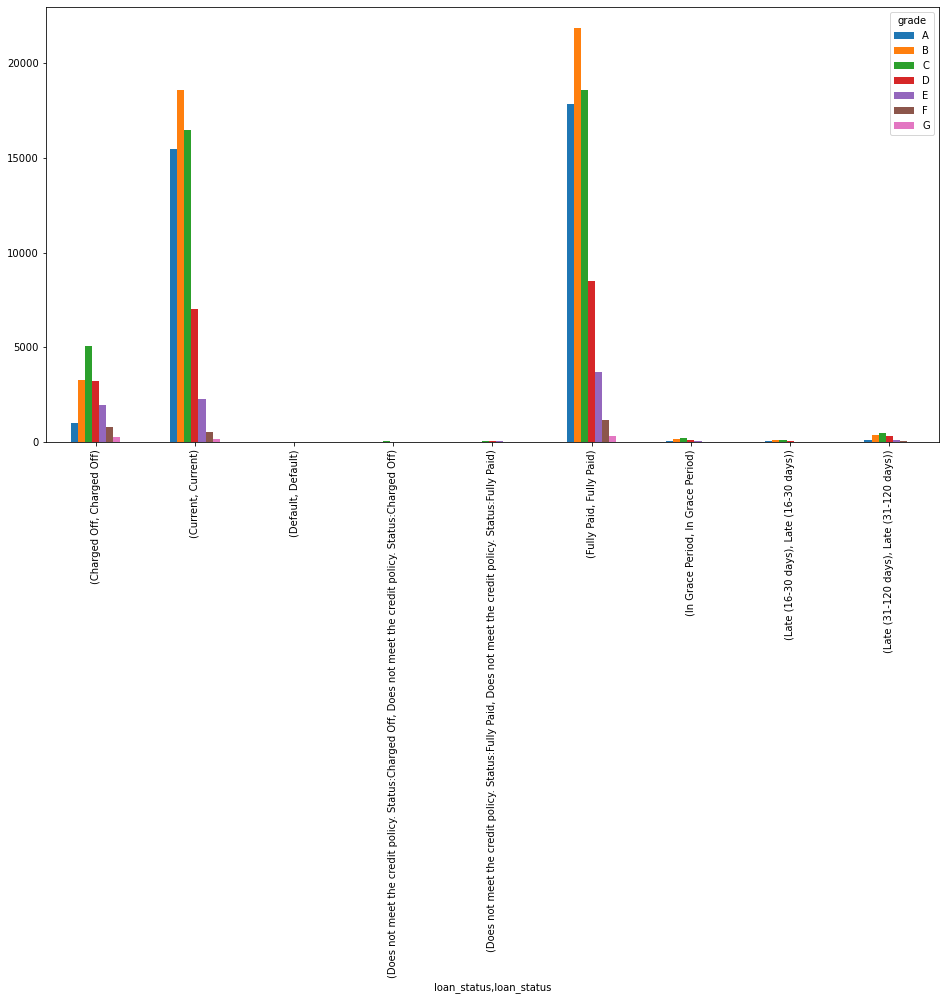

********************
house


<Figure size 432x288 with 0 Axes>

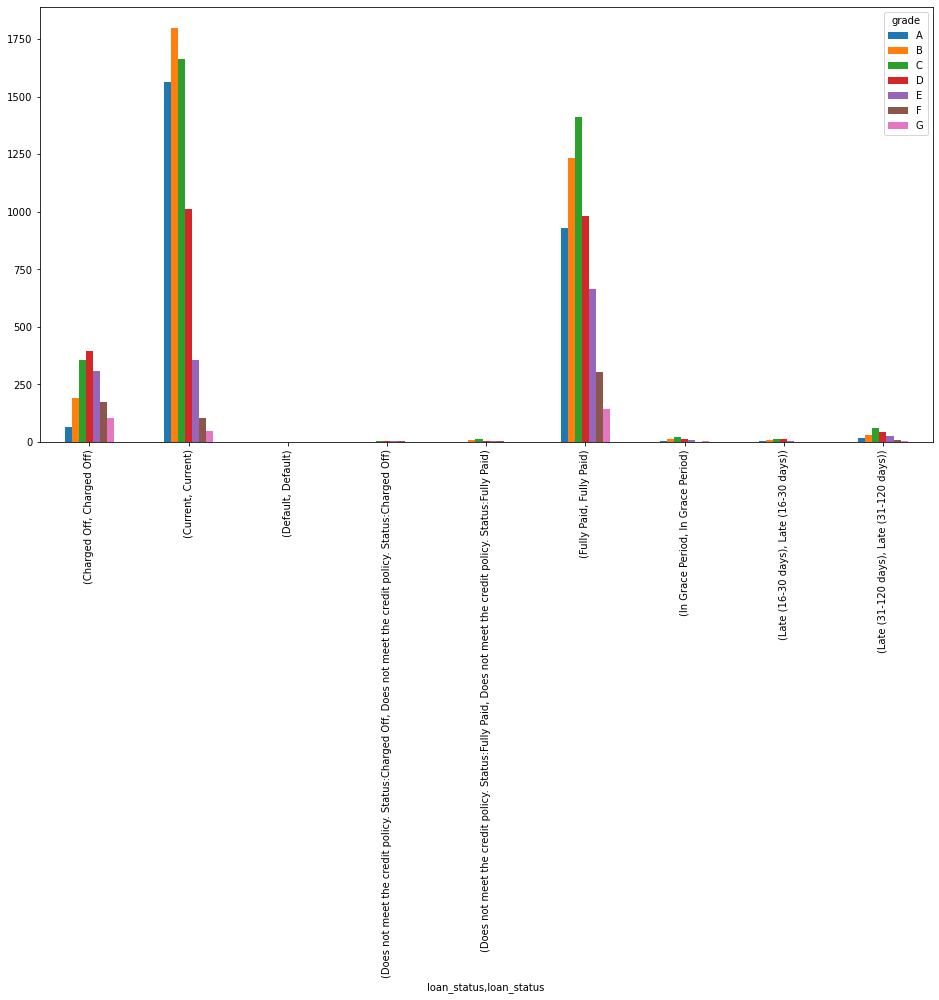

********************
major_purchase


<Figure size 432x288 with 0 Axes>

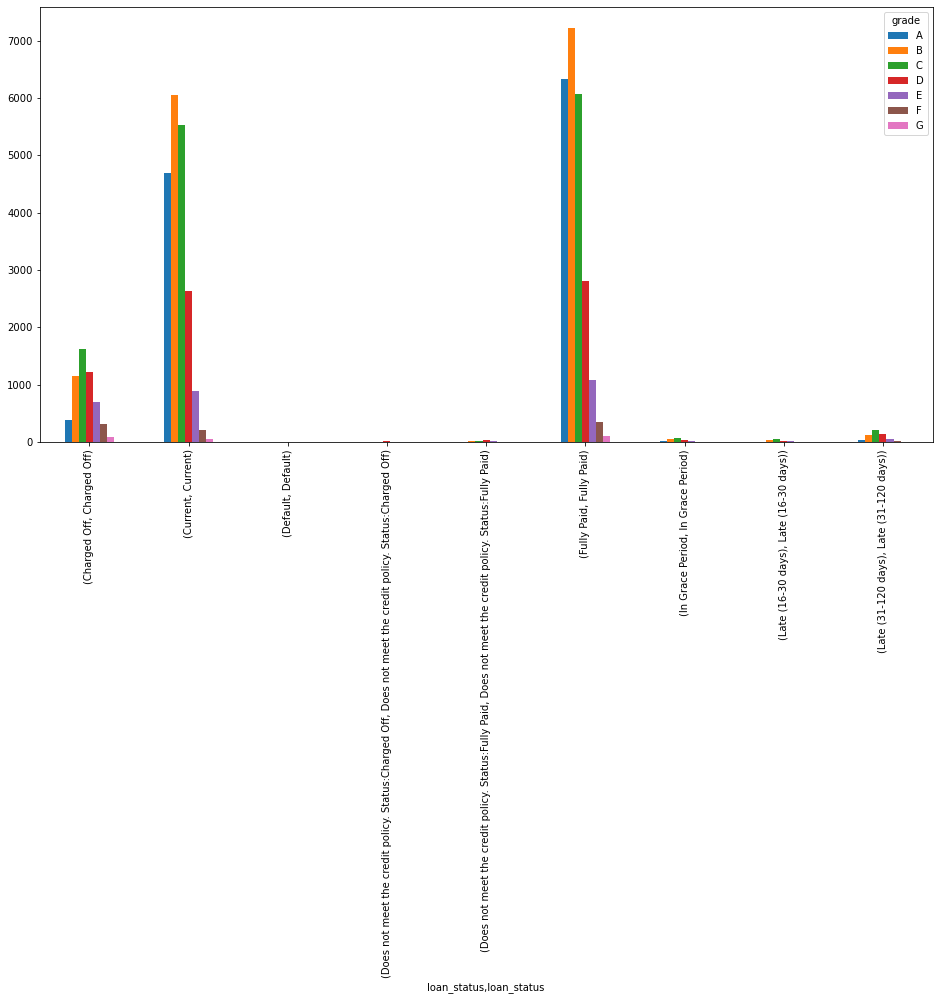

********************
medical


<Figure size 432x288 with 0 Axes>

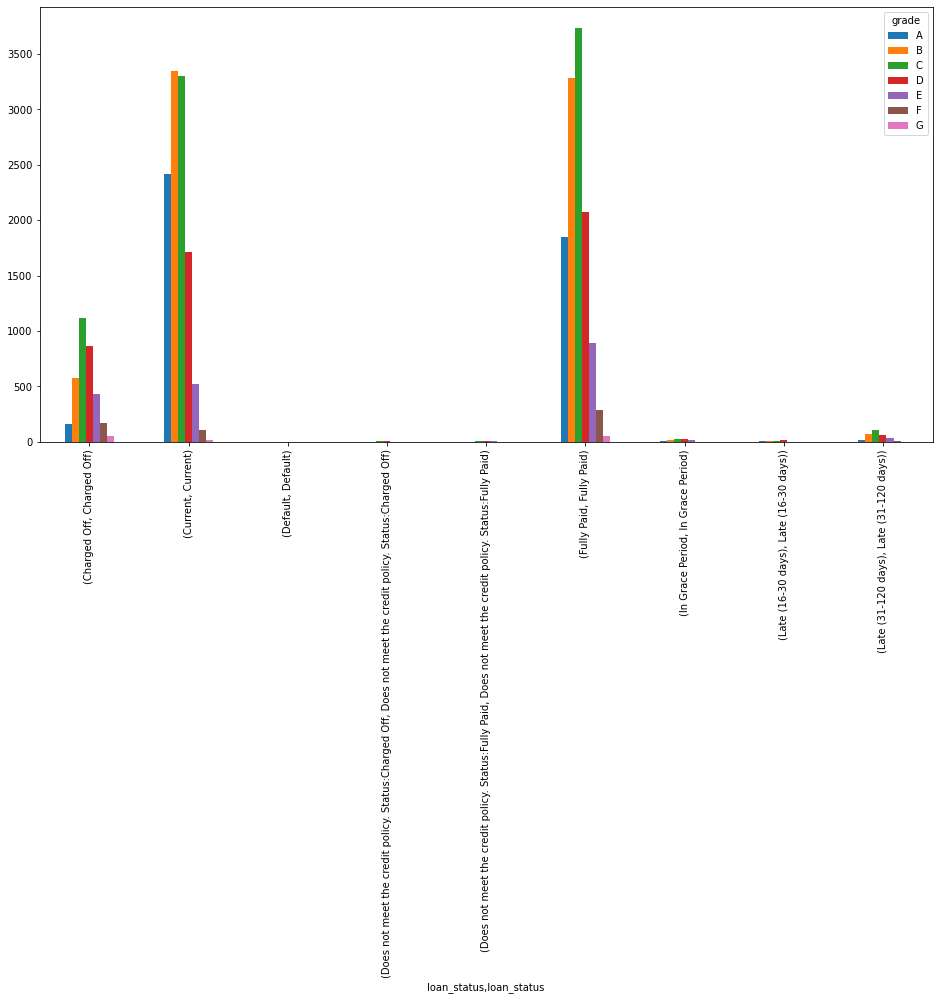

********************
moving


<Figure size 432x288 with 0 Axes>

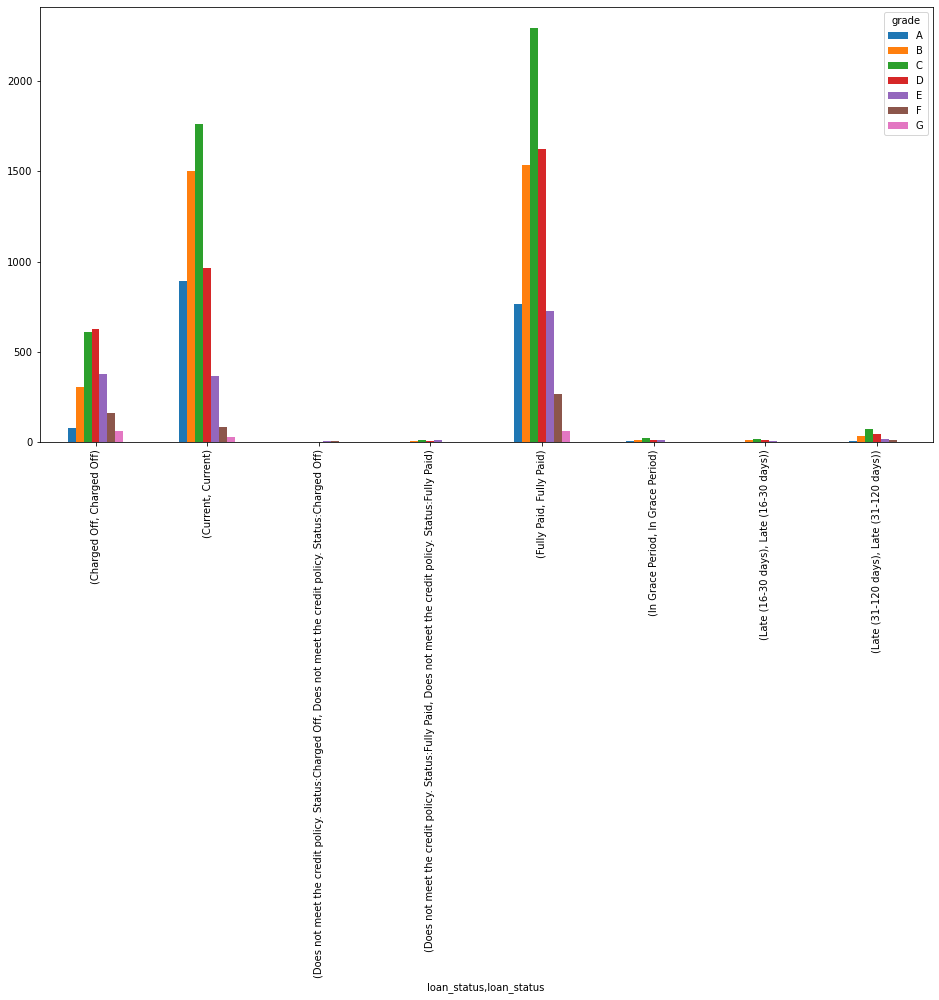

********************
other


<Figure size 432x288 with 0 Axes>

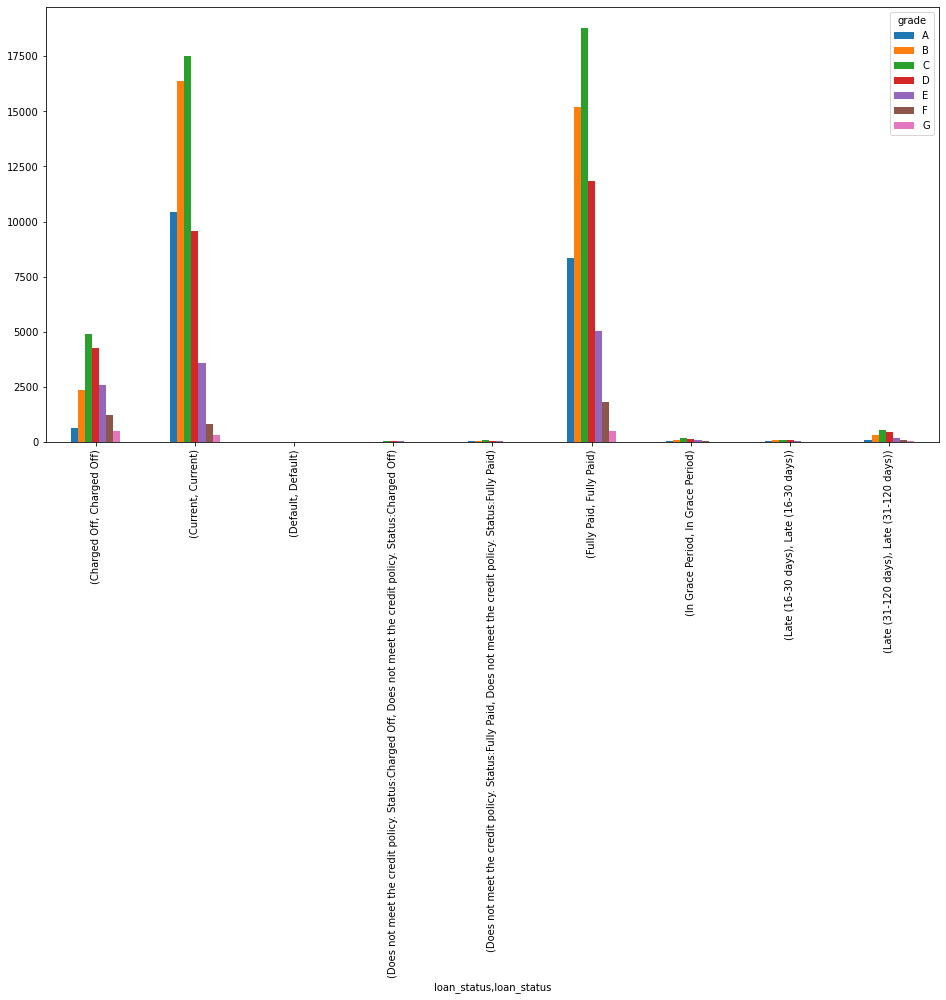

********************
renewable_energy


<Figure size 432x288 with 0 Axes>

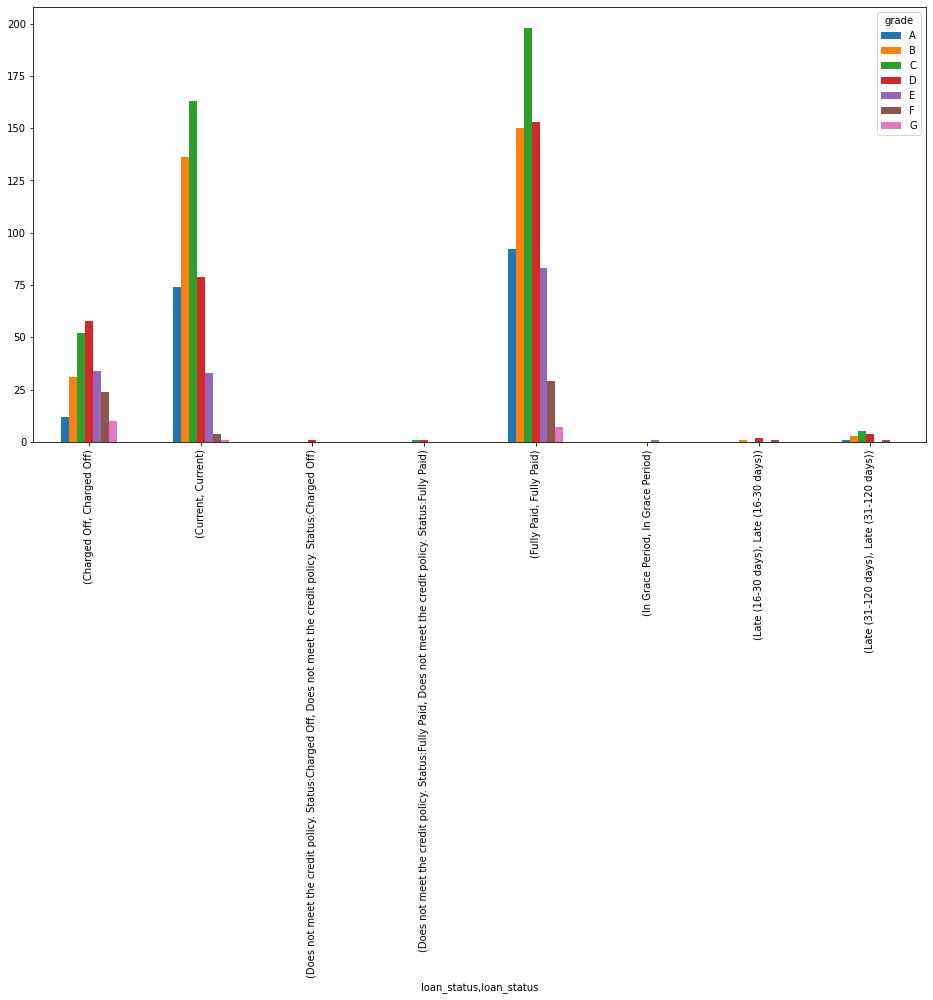

********************
small_business


<Figure size 432x288 with 0 Axes>

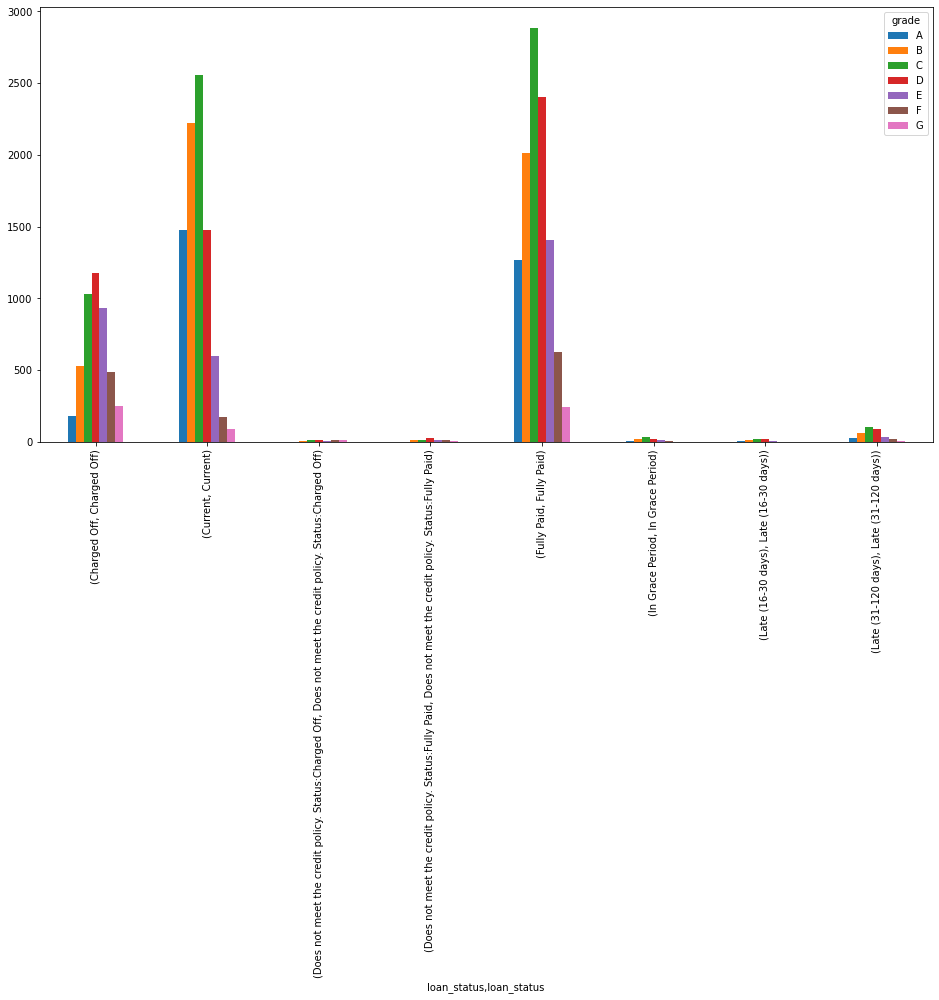

********************
vacation


<Figure size 432x288 with 0 Axes>

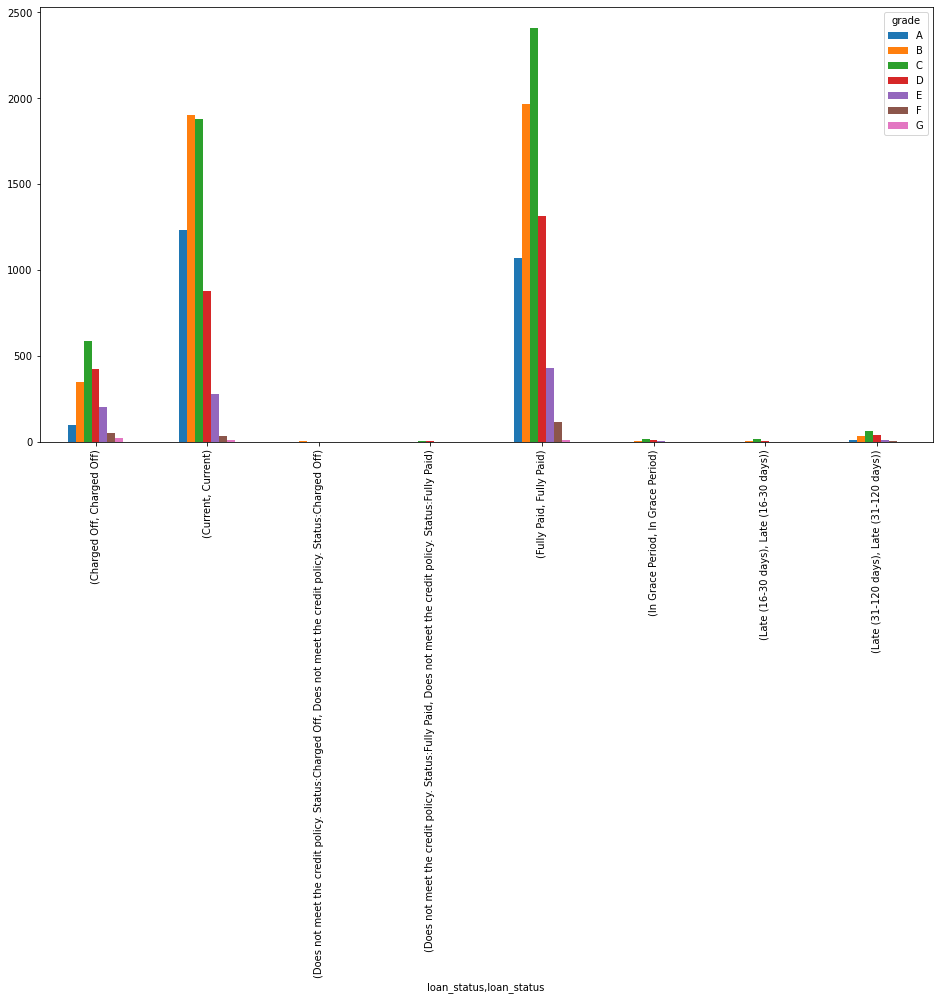

********************
wedding


<Figure size 432x288 with 0 Axes>

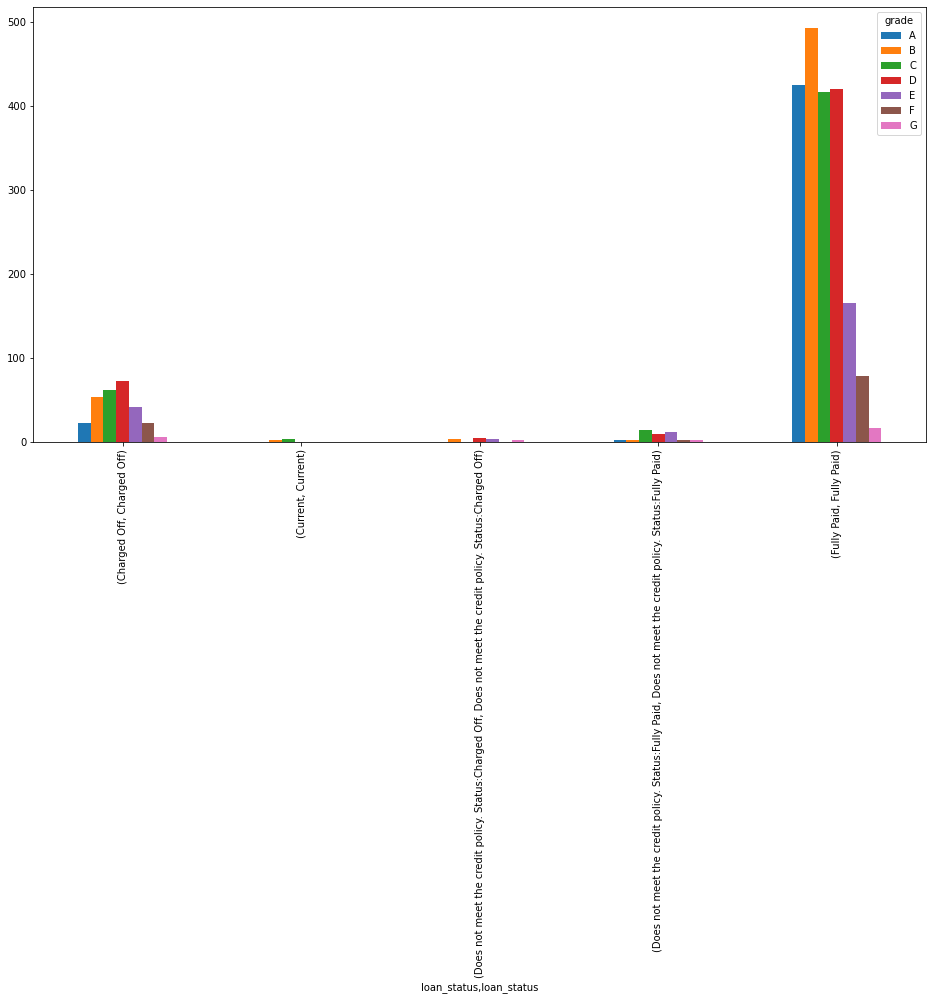

********************


In [33]:
acc_purpose_list = sorted(list(acc_question2['purpose'].unique()))

for acc_purp in acc_purpose_list:
    print(acc_purp)
    plt.figure()
    try:
        acc[(acc['purpose']==acc_purp)].groupby(['loan_status', 'grade'])\
        ['loan_status'].value_counts().unstack('grade').plot(kind='bar', figsize=(16, 8))
    except:
        pass
    plt.show()
    print('*'*20)

### Bullet 3

In [34]:
fundedamnt_median = acc_question2['funded_amnt'].median()
fundedamnt_mean = acc_question2['funded_amnt'].mean()

In [35]:
acc_question2[acc_question2['funded_amnt']>fundedamnt_median][['loan_status']]

,loan_status
1,Fully Paid
2,Fully Paid
3,Current
6,Fully Paid
7,Fully Paid
...,...
2260694,Current
2260695,Current
2260696,Current
2260697,Charged Off


<AxesSubplot:xlabel='loan_status'>

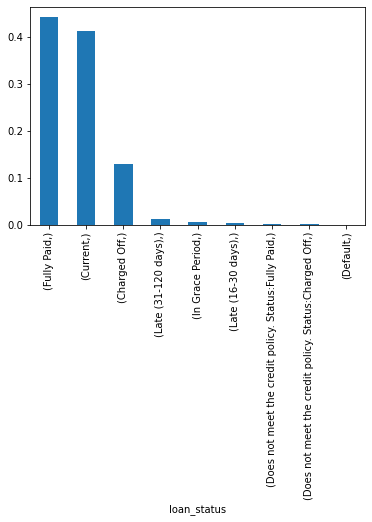

In [36]:
acc_question2[acc_question2['funded_amnt']>fundedamnt_median]\
[['loan_status']].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='loan_status'>

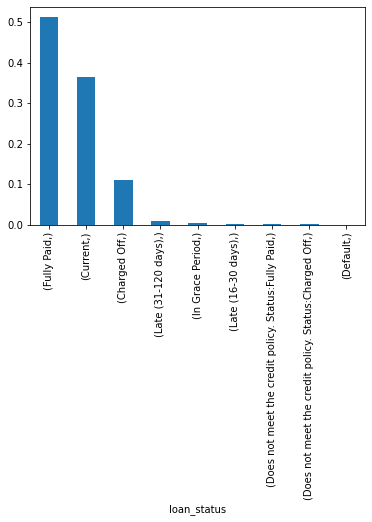

In [37]:
acc_question2[acc_question2['funded_amnt']<=fundedamnt_median]\
[['loan_status']].value_counts(normalize=True).plot(kind='bar')

# Question 3

## Bullet 1

In [38]:
acc['int_rate']

0          13.99
1          11.99
2          10.78
3          14.85
4          22.45
           ...  
2260694    12.79
2260695    10.49
2260696    10.49
2260697    14.49
2260698    14.49
Name: int_rate, Length: 2260668, dtype: float64

In [39]:
intrate_mean = acc['int_rate'].mean()
intrate_median = acc['int_rate'].median()

<AxesSubplot:xlabel='grade'>

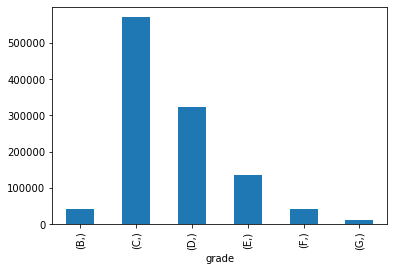

In [40]:
# we see no 'A' grades

acc[acc['int_rate']>intrate_median][['grade']].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:xlabel='grade'>

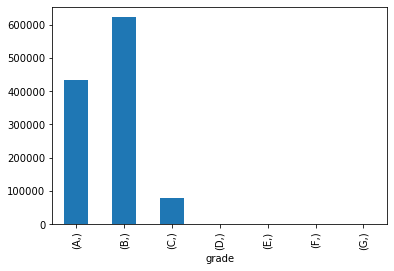

In [41]:
# we see nothing below 'C' grades

acc[acc['int_rate']<=intrate_median][['grade']].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:xlabel='sub_grade'>

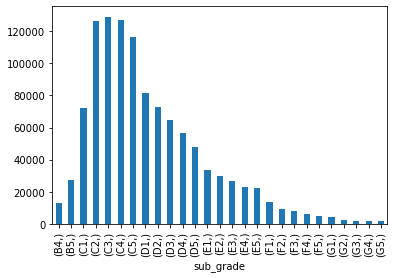

In [42]:
# we see no 'A' grades

acc[acc['int_rate']>intrate_median][['sub_grade']].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:xlabel='sub_grade'>

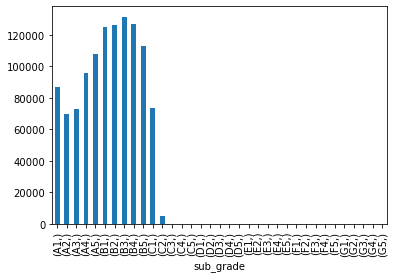

In [43]:
# we see nothing below 'C' grades

acc[acc['int_rate']<=intrate_median][['sub_grade']].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:xlabel='term'>

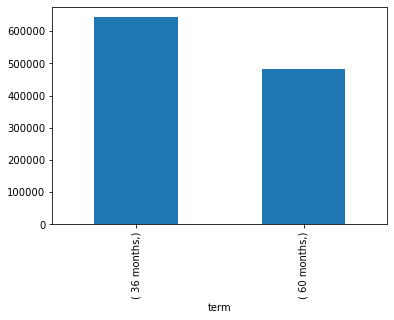

In [44]:
acc[acc['int_rate']>intrate_median][['term']].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:xlabel='term'>

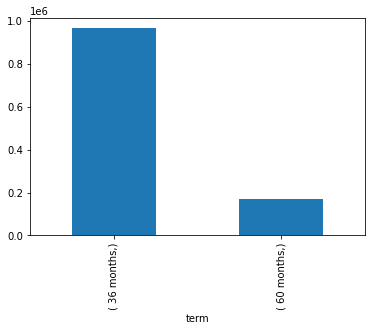

In [45]:
acc[acc['int_rate']<=intrate_median][['term']].value_counts().sort_index().plot(kind='bar')

## Bullet 2

In [46]:
acc[(acc['int_rate']>intrate_median)][['int_rate', 'grade', 'issue_d']]

,int_rate,grade,issue_d
0,13.99,C,Dec-2015
3,14.85,C,Dec-2015
4,22.45,F,Dec-2015
5,13.44,C,Dec-2015
10,12.88,C,Dec-2015
...,...,...,...
2260691,14.49,C,Oct-2016
2260692,12.79,C,Oct-2016
2260694,12.79,C,Oct-2016
2260697,14.49,C,Oct-2016


<AxesSubplot:xlabel='year'>

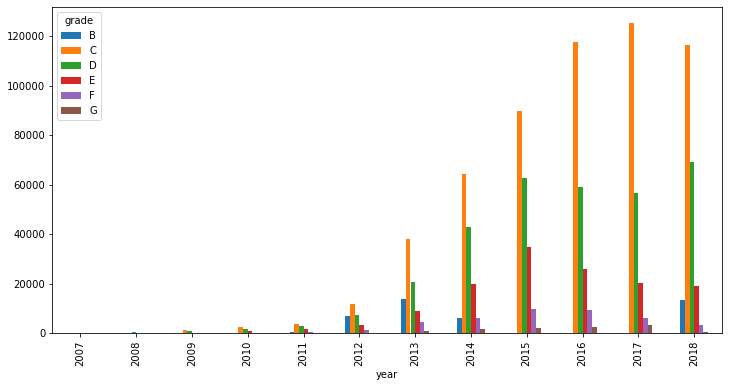

In [47]:
# # we see no 'A' grades

list_issue_d = sorted(list(acc['year'].unique()))
acc_intrate = acc[['int_rate', 'grade', 'year']]

acc_intrate[(acc_intrate['int_rate']>intrate_median)].groupby('year')\
        ['grade'].value_counts().unstack('grade').sort_index().plot(kind='bar', figsize=(12, 6))

<AxesSubplot:xlabel='month'>

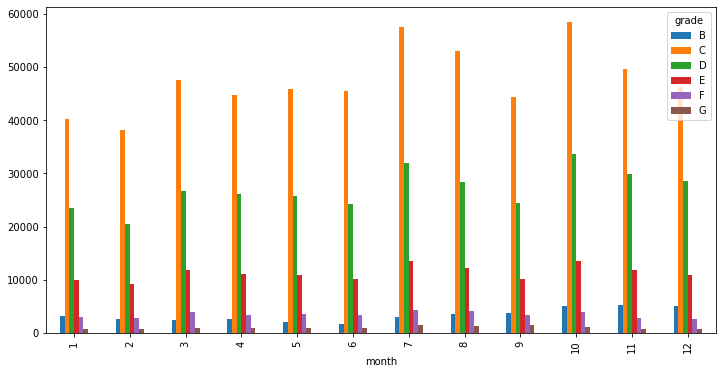

In [48]:
# also do for months

acc['month'] = pd.DatetimeIndex(acc['issue_d']).month

list_issue_d = sorted(list(acc['month'].unique()))
acc_intrate = acc[['int_rate', 'grade', 'month']]

acc_intrate[(acc_intrate['int_rate']>intrate_median)].groupby('month')\
        ['grade'].value_counts().unstack('grade').sort_index().plot(kind='bar', figsize=(12, 6))

# Question 4

## Bullet 1

In [49]:
acc['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

<AxesSubplot:xlabel='loan_status,term'>

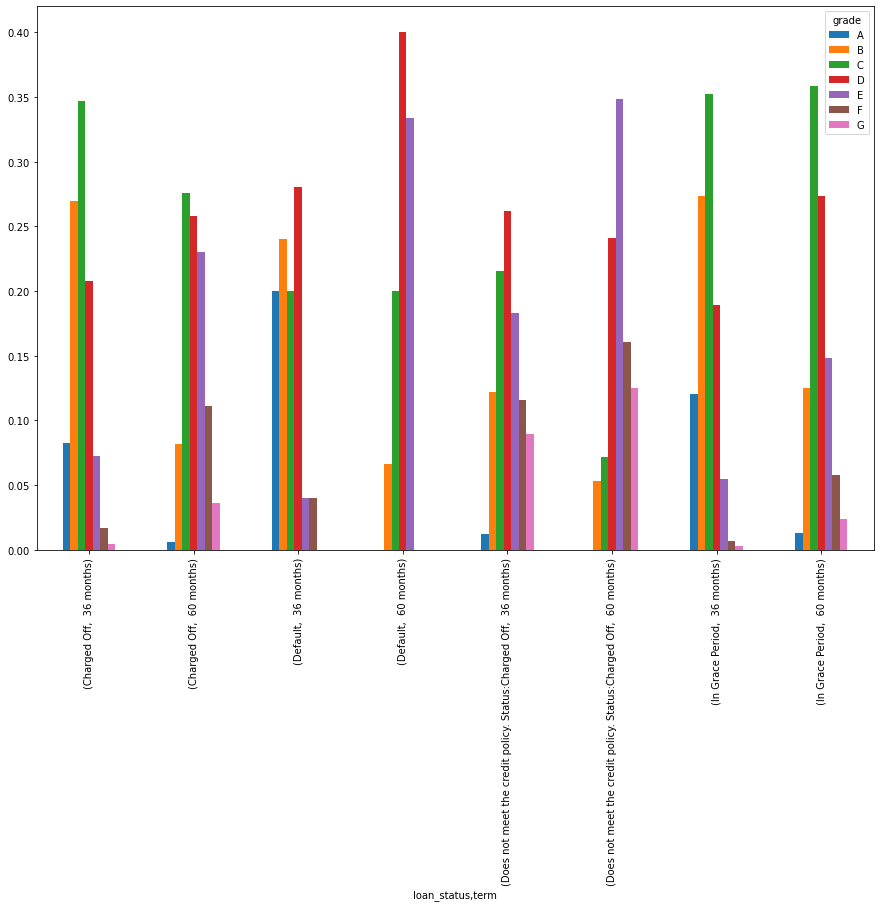

In [50]:
# drop loan status with 'Fully Paid'
acc_list_notfullypaid = list(acc[acc['loan_status'].str.contains('Fully Paid|Current|Late', na=False)].index)
acc_notfullypaid = acc.drop(acc_list_notfullypaid)
acc_sub_notfullypaid = acc_notfullypaid[['int_rate', 'grade', 'sub_grade', 'loan_status', 'term']]

# drop loan status not fully paid or current
acc_list_fullypaid = list(acc[~acc['loan_status'].str.contains('Fully Paid|Current|Late', na=False)].index)
acc_fullypaid = acc.drop(acc_list_fullypaid)
acc_sub_fullypaid = acc_fullypaid[['int_rate', 'grade', 'sub_grade', 'loan_status', 'term']]

acc_sub_notfullypaid.groupby(['loan_status', 'term'])\
['grade'].value_counts(normalize=True).unstack('grade').sort_index().plot(kind='bar', figsize =(15, 10))

<AxesSubplot:xlabel='loan_status,term'>

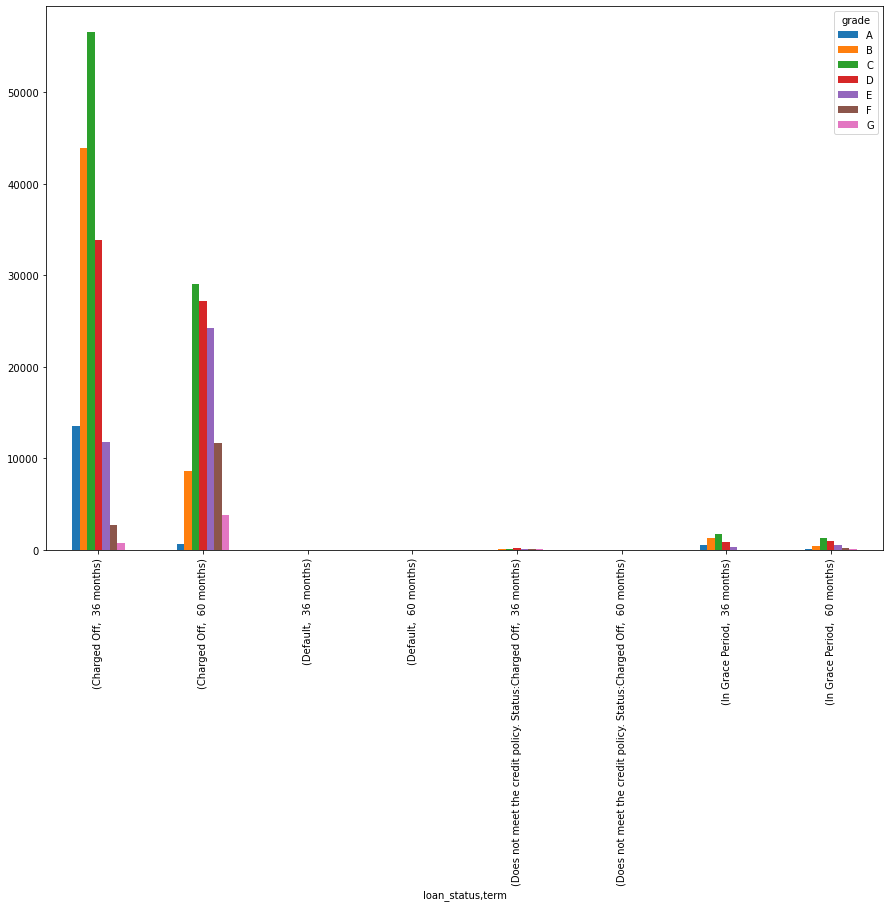

In [51]:
acc_sub_notfullypaid.groupby(['loan_status', 'term'])\
['grade'].value_counts().unstack('grade').sort_index().plot(kind='bar', figsize =(15, 10))

<AxesSubplot:xlabel='loan_status'>

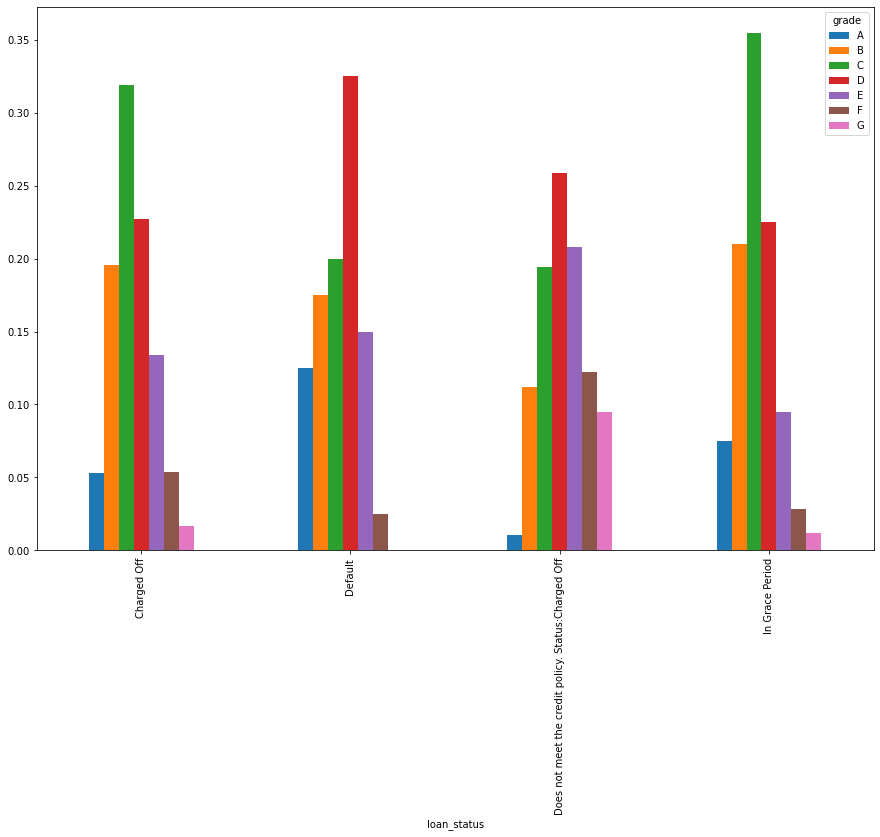

In [52]:
acc_sub_notfullypaid.groupby(['loan_status'])\
['grade'].value_counts(normalize=True).unstack('grade').sort_index().plot(kind='bar', figsize =(15, 10))

<AxesSubplot:xlabel='loan_status'>

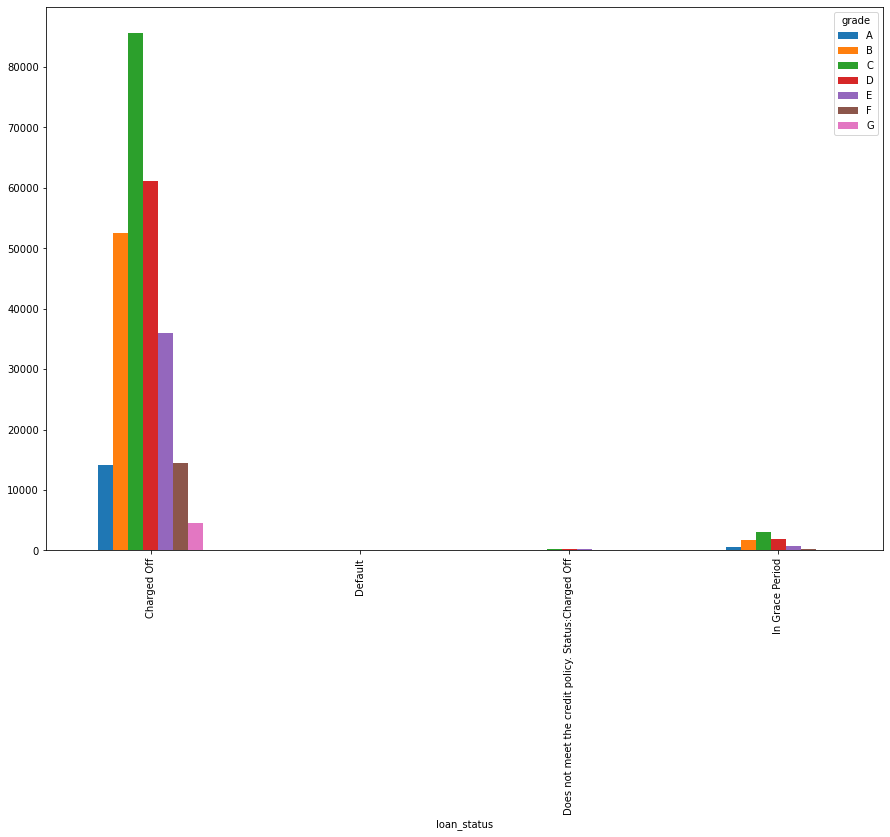

In [53]:
acc_sub_notfullypaid.groupby(['loan_status'])\
['grade'].value_counts().unstack('grade').sort_index().plot(kind='bar', figsize =(15, 10))

## Bullet 2

In [54]:
acc_sub_fullypaid.groupby(['loan_status'])['grade'].value_counts(normalize=True)

loan_status                                         grade
Current                                             B        0.299326
                                                    C        0.291133
                                                    A        0.222629
                                                    D        0.131089
                                                    E        0.043356
                                                    F        0.009661
                                                    G        0.002807
Does not meet the credit policy. Status:Fully Paid  D        0.248491
                                                    C        0.241952
                                                    E        0.190141
                                                    B        0.135312
                                                    F        0.077465
                                                    G        0.061368
                                

<AxesSubplot:xlabel='loan_status,term'>

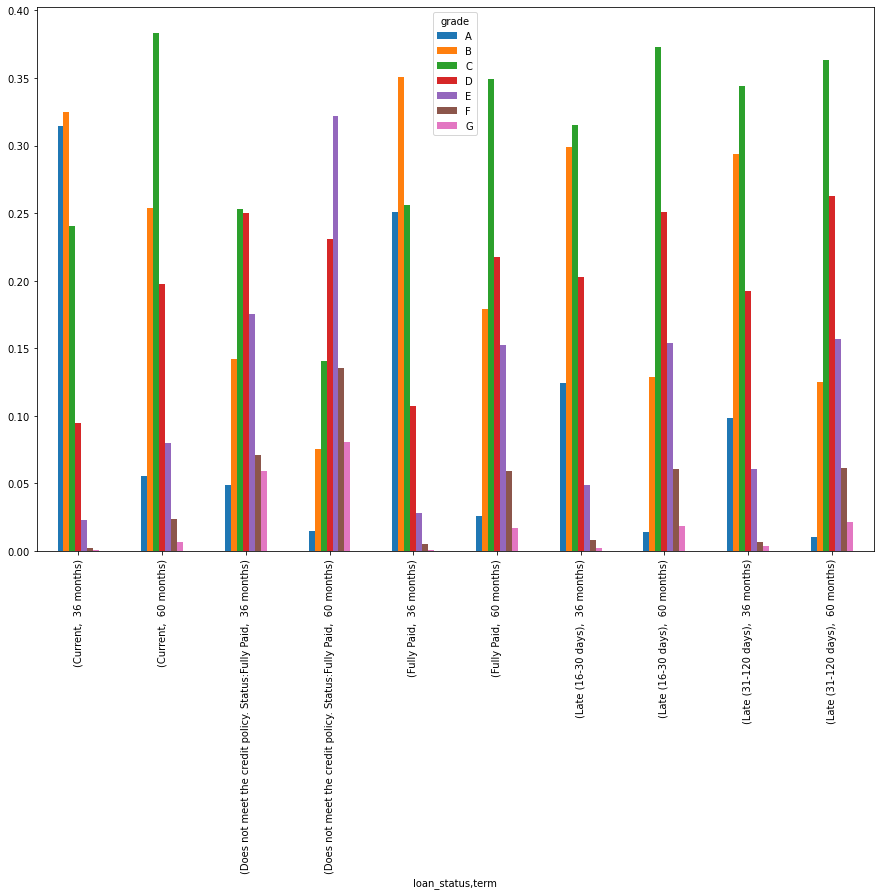

In [55]:
acc_sub_fullypaid.groupby(['loan_status', 'term'])\
['grade'].value_counts(normalize=True).unstack('grade').sort_index().plot(kind='bar', figsize=(15,10))

<AxesSubplot:xlabel='loan_status'>

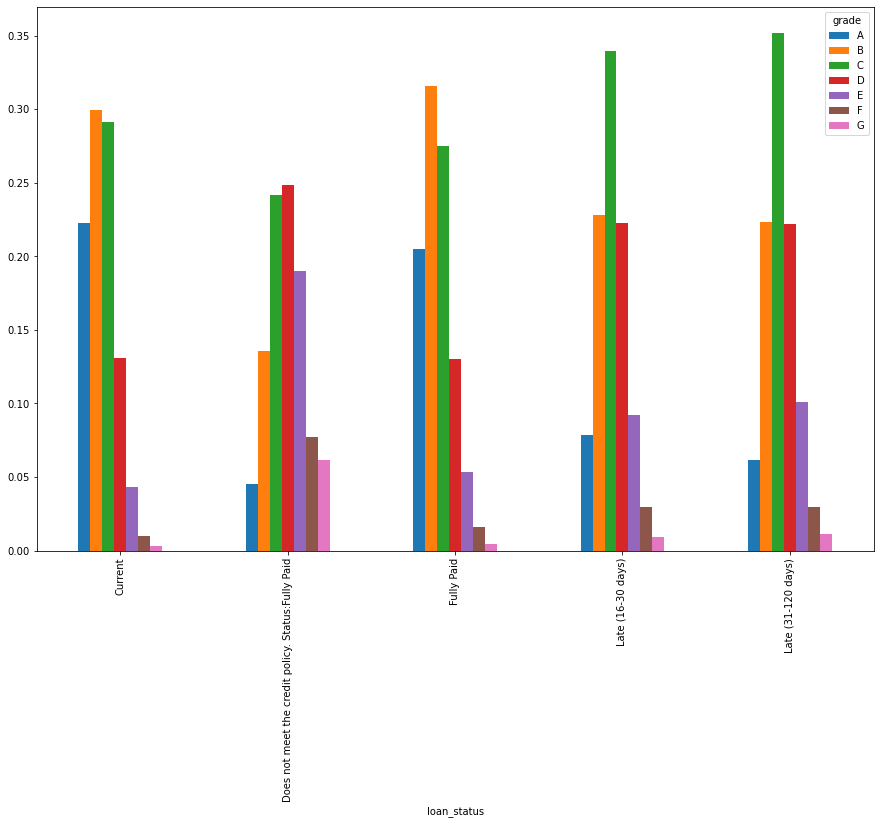

In [56]:
acc_sub_fullypaid.groupby(['loan_status'])\
['grade'].value_counts(normalize=True).unstack('grade').sort_index().plot(kind='bar', figsize=(15,10))

## Bullet 3

In [57]:
acc_ratehike = acc[['int_rate', 'grade', 'sub_grade', 'loan_status', 'term']]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, '(A,  36 months)'),
  Text(2, 0, '(A,  60 months)'),
  Text(3, 0, '(B,  36 months)'),
  Text(4, 0, '(B,  60 months)'),
  Text(5, 0, '(C,  36 months)'),
  Text(6, 0, '(C,  60 months)'),
  Text(7, 0, '(D,  36 months)'),
  Text(8, 0, '(D,  60 months)'),
  Text(9, 0, '(E,  36 months)'),
  Text(10, 0, '(E,  60 months)'),
  Text(11, 0, '(F,  36 months)'),
  Text(12, 0, '(F,  60 months)'),
  Text(13, 0, '(G,  36 months)'),
  Text(14, 0, '(G,  60 months)')])

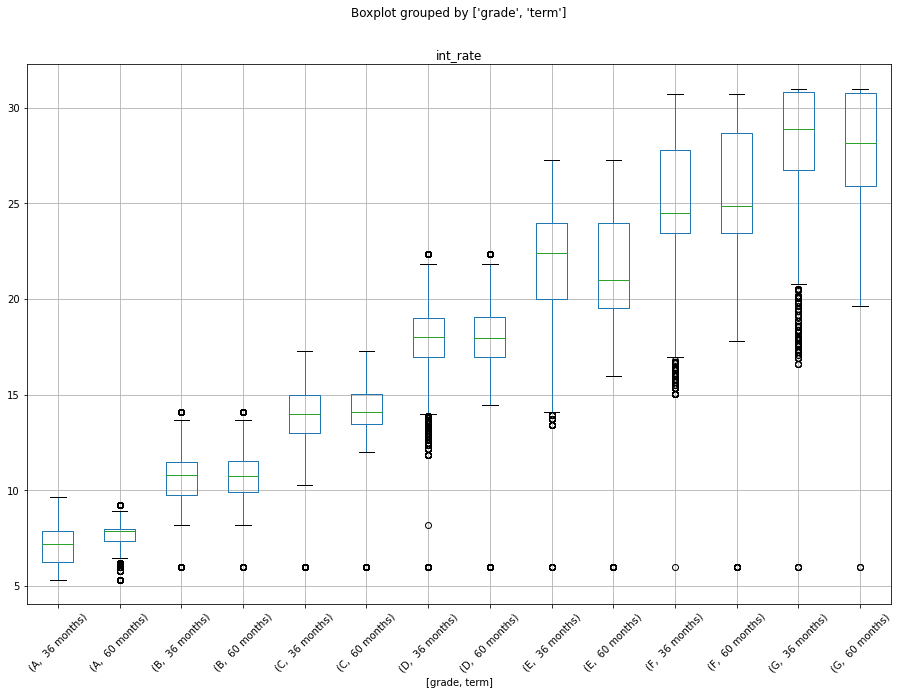

In [58]:
acc_ratehike = acc[['int_rate', 'grade', 'sub_grade', 'loan_status', 'term']]

acc_ratehike.boxplot(by=['grade', 'term'], column='int_rate', figsize=(15, 10))
plt.xticks(rotation=45)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70]),
 [Text(1, 0, '(A1,  36 months)'),
  Text(2, 0, '(A1,  60 months)'),
  Text(3, 0, '(A2,  36 months)'),
  Text(4, 0, '(A2,  60 months)'),
  Text(5, 0, '(A3,  36 months)'),
  Text(6, 0, '(A3,  60 months)'),
  Text(7, 0, '(A4,  36 months)'),
  Text(8, 0, '(A4,  60 months)'),
  Text(9, 0, '(A5,  36 months)'),
  Text(10, 0, '(A5,  60 months)'),
  Text(11, 0, '(B1,  36 months)'),
  Text(12, 0, '(B1,  60 months)'),
  Text(13, 0, '(B2,  36 months)'),
  Text(14, 0, '(B2,  60 months)'),
  Text(15, 0, '(B3,  36 months)'),
  Text(16, 0, '(B3,  60 months)'),
  Text(17, 0, '(B4,  36 months)'),
  Text(18, 0, '(B4,  60 months)'),
  Text(19, 0, '(B5,  36 months)'),
  Text(20, 0, '(B5,  6

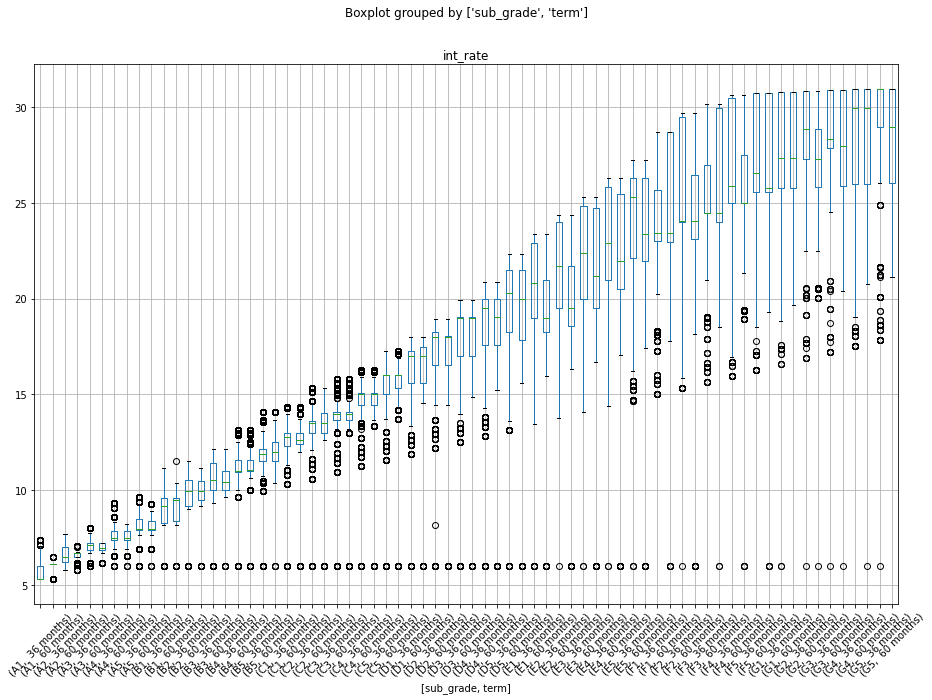

In [59]:
acc_ratehike.boxplot(by=['sub_grade', 'term'], column='int_rate', figsize=(15, 10))
plt.xticks(rotation=45)

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, '(Charged Off,  36 months)'),
  Text(2, 0, '(Charged Off,  60 months)'),
  Text(3, 0, '(Default,  36 months)'),
  Text(4, 0, '(Default,  60 months)'),
  Text(5, 0, '(Does not meet the credit policy. Status:Charged Off,  36 months)'),
  Text(6, 0, '(Does not meet the credit policy. Status:Charged Off,  60 months)'),
  Text(7, 0, '(In Grace Period,  36 months)'),
  Text(8, 0, '(In Grace Period,  60 months)')])

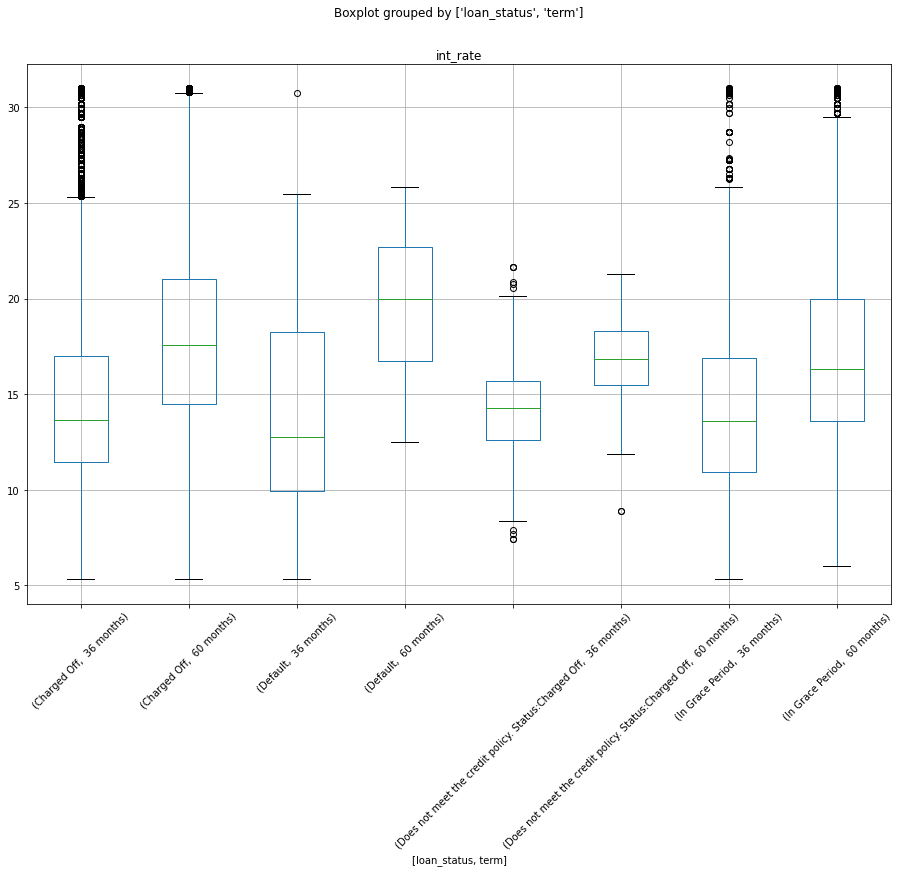

In [60]:
# acc_list_notfullypaid = list(acc[acc['loan_status'].str.contains('Fully Paid|Current|Late', na=False)].index)
# acc_notfullypaid = acc.drop(acc_list_notfullypaid)
# acc_sub_notfullypaid = acc_notfullypaid[['int_rate', 'grade', 'sub_grade', 'loan_status', 'term']]

acc_sub_notfullypaid.boxplot(by=['loan_status', 'term'], column='int_rate', figsize=(15,10))
plt.xticks(rotation=45)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, '(Current,  36 months)'),
  Text(2, 0, '(Current,  60 months)'),
  Text(3, 0, '(Does not meet the credit policy. Status:Fully Paid,  36 months)'),
  Text(4, 0, '(Does not meet the credit policy. Status:Fully Paid,  60 months)'),
  Text(5, 0, '(Fully Paid,  36 months)'),
  Text(6, 0, '(Fully Paid,  60 months)'),
  Text(7, 0, '(Late (16-30 days),  36 months)'),
  Text(8, 0, '(Late (16-30 days),  60 months)'),
  Text(9, 0, '(Late (31-120 days),  36 months)'),
  Text(10, 0, '(Late (31-120 days),  60 months)')])

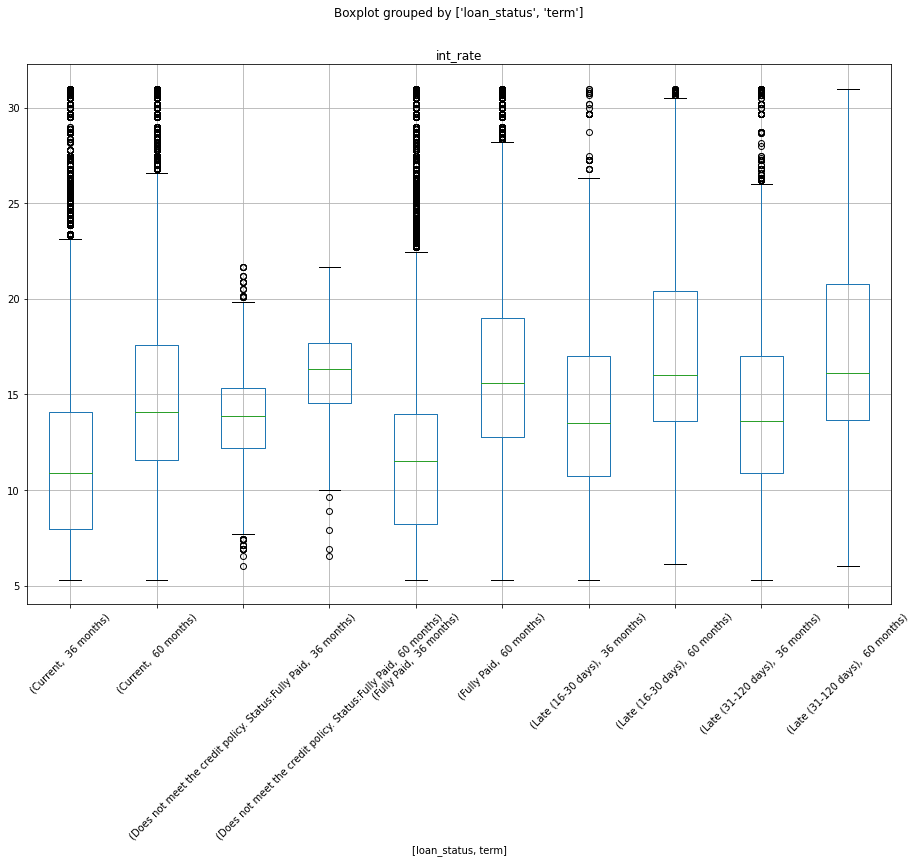

In [61]:
acc_sub_fullypaid.boxplot(by=['loan_status', 'term'], column='int_rate', figsize=(15,10))
plt.xticks(rotation=45)

In [62]:
acc_sub_interest = acc[['funded_amnt', 'last_pymnt_amnt', 'installment', 'term', 'total_pymnt',
                        'out_prncp', 'total_rec_int', 'int_rate', 'sub_grade', 'grade']]

acc_sub_interest['pos_profit'] = acc_sub_interest['total_pymnt'] - acc_sub_interest['funded_amnt']
acc_sub_interest.pos_profit = np.where(acc_sub_interest.pos_profit<0, 0, acc_sub_interest.pos_profit)

acc_sub_interest

<ipython-input-62-923a4eac34d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_sub_interest['pos_profit'] = acc_sub_interest['total_pymnt'] - acc_sub_interest['funded_amnt']
C:\Users\tdcho\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,funded_amnt,last_pymnt_amnt,installment,term,total_pymnt,out_prncp,total_rec_int,int_rate,sub_grade,grade,pos_profit
0,3600.0,122.67,123.03,36 months,4421.723917,0.00,821.72,13.99,C4,C,821.723917
1,24700.0,926.35,820.28,36 months,25679.660000,0.00,979.66,11.99,C1,C,979.660000
2,20000.0,15813.30,432.66,60 months,22705.924294,0.00,2705.92,10.78,B4,B,2705.924294
3,35000.0,829.90,829.90,60 months,31464.010000,15897.65,12361.66,14.85,C5,C,0.000000
4,10400.0,10128.96,289.91,60 months,11740.500000,0.00,1340.50,22.45,F1,F,1340.500000
...,...,...,...,...,...,...,...,...,...,...,...
2260694,24000.0,543.50,543.50,60 months,15760.500000,14287.39,6047.89,12.79,C1,C,0.000000
2260695,24000.0,515.74,515.74,60 months,15008.530000,13951.42,4959.95,10.49,B3,B,0.000000
2260696,40000.0,859.56,859.56,60 months,24903.930000,23252.59,8156.52,10.49,B3,B,0.000000
2260697,24000.0,564.56,564.56,60 months,6755.400000,0.00,3233.49,14.49,C4,C,0.000000


### Answer below

<AxesSubplot:xlabel='term'>

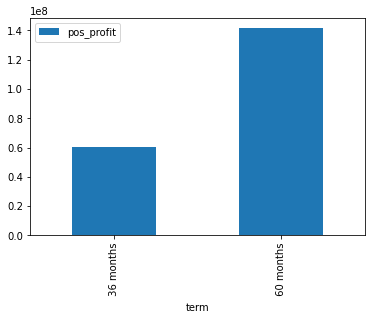

In [63]:
'''
by the even distribution, we can see that despite the higher likelihood of lower grades not paying in full,
the lender is able to recoup as much overall (because of the higher interest rate)
'''

acc_sub_interest[acc_sub_interest['out_prncp']>0].groupby(['term'])[['pos_profit']].sum().plot(kind='bar')

<AxesSubplot:xlabel='grade'>

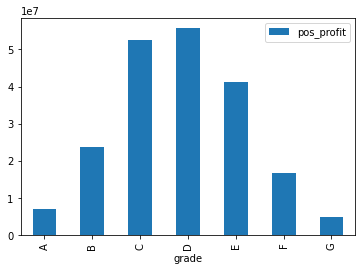

In [64]:
acc_sub_interest[acc_sub_interest['out_prncp']>0].groupby(['grade'])[['pos_profit']].sum().plot(kind='bar')

<AxesSubplot:xlabel='grade'>

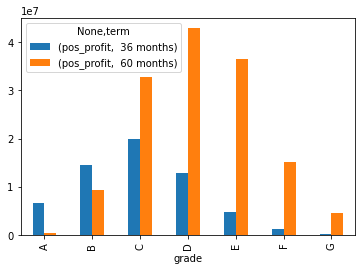

In [65]:
# we see that there is more profit for loans that cover 60 months even when there is an outstanding balance on the loan

acc_sub_interest[acc_sub_interest['out_prncp']>0].groupby(['term', 'grade'])\
[['pos_profit']].sum().unstack('term').plot(kind='bar')

<AxesSubplot:xlabel='term'>

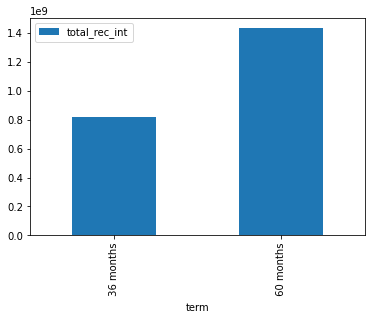

In [66]:
# here, we see a breakdown of specifically the total received interest based on grade

acc_sub_interest[acc_sub_interest['out_prncp']>0].groupby('term')[['total_rec_int']].sum().plot(kind='bar')

<AxesSubplot:xlabel='grade'>

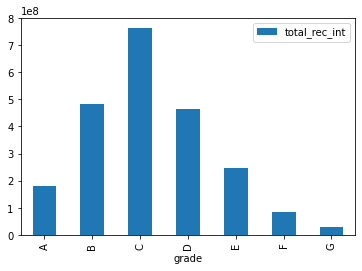

In [67]:
acc_sub_interest[acc_sub_interest['out_prncp']>0].groupby('grade')[['total_rec_int']].sum().plot(kind='bar')

<AxesSubplot:xlabel='grade'>

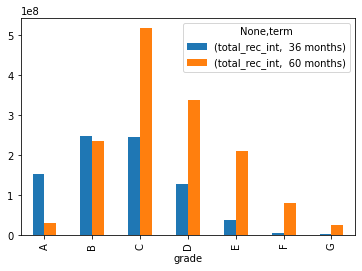

In [68]:
acc_sub_interest[acc_sub_interest['out_prncp']>0].groupby(['grade', 'term'])\
[['total_rec_int']].sum().unstack('term').plot(kind='bar')

## Bullet 4

In [69]:
acc[acc['settlement_percentage'].notnull()][['funded_amnt', 'out_prncp', 'total_pymnt',
                                             'settlement_amount', 'settlement_percentage',
                                             'settlement_status', 'int_rate']]

,funded_amnt,out_prncp,total_pymnt,settlement_amount,settlement_percentage,settlement_status,int_rate
68,20000.0,0.0,15473.02,9915.00,55.00,COMPLETE,13.99
99,7200.0,0.0,3767.42,2761.00,50.01,BROKEN,17.27
105,17475.0,0.0,15789.65,4382.00,44.99,COMPLETE,13.99
143,20000.0,0.0,17622.83,3513.00,45.01,ACTIVE,11.99
144,35000.0,0.0,25266.06,13403.00,45.00,COMPLETE,12.88
...,...,...,...,...,...,...,...
2260500,36000.0,0.0,17943.70,11531.00,45.00,ACTIVE,10.99
2260552,7200.0,0.0,4858.99,2203.54,40.00,COMPLETE,12.79
2260567,16000.0,0.0,12972.13,6657.00,50.00,COMPLETE,13.99
2260578,19200.0,0.0,11312.36,6487.00,45.00,ACTIVE,17.99


In [70]:
acc['settlement_diff'] = acc['total_pymnt'] - acc['funded_amnt']

acc[acc['settlement_diff']<0]['grade'].value_counts().sort_index()

A    200833
B    297691
C    319636
D    160494
E     63814
F     19324
G      6271
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade,grade'>

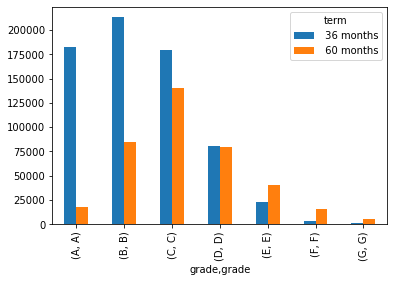

In [71]:
# we see more settlements for grades A, B, C for 36 month terms

acc[acc['settlement_diff']<0].groupby(['grade', 'term'])\
['grade'].value_counts().unstack('term').sort_index().plot(kind='bar')

# Question 5

In [72]:
acc['term'] = acc['term'].map(lambda x: x.rstrip(' months')).astype('int')
acc['term'] 

0          36
1          36
2          60
3          60
4          60
           ..
2260694    60
2260695    60
2260696    60
2260697    60
2260698    60
Name: term, Length: 2260668, dtype: int32

In [73]:
acc['actual_duration_months'] = (pd.DatetimeIndex(acc['last_pymnt_d']).year - pd.DatetimeIndex(acc['issue_d']).year)*12 +\
(pd.DatetimeIndex(acc['last_pymnt_d']).month - pd.DatetimeIndex(acc['issue_d']).month)

acc['duration_lessthan_term'] = acc['term'] - acc['actual_duration_months']
acc['duration_lessthan_term_simple'] = acc['duration_lessthan_term']

# did the loan go to maturity?
acc.loc[acc['duration_lessthan_term_simple']>0, 'duration_lessthan_term_simple']=1
acc.loc[acc['duration_lessthan_term_simple']<=0, 'duration_lessthan_term_simple']=0

In [74]:
acc['actual_duration_months']

0          37.0
1           6.0
2          18.0
3          38.0
4           7.0
           ... 
2260694    29.0
2260695    29.0
2260696    29.0
2260697    12.0
2260698    29.0
Name: actual_duration_months, Length: 2260668, dtype: float64

In [75]:
acc['duration_lessthan_term']

0          -1.0
1          30.0
2          42.0
3          22.0
4          53.0
           ... 
2260694    31.0
2260695    31.0
2260696    31.0
2260697    48.0
2260698    31.0
Name: duration_lessthan_term, Length: 2260668, dtype: float64

In [76]:
acc['duration_lessthan_term_simple']

0          0.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
2260694    1.0
2260695    1.0
2260696    1.0
2260697    1.0
2260698    1.0
Name: duration_lessthan_term_simple, Length: 2260668, dtype: float64

In [77]:
acc['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [78]:
acc_list_onlyfullypaid = list(acc[~acc['loan_status'].str.contains('Fully Paid', na=False)].index)
acc_list_onlynonfullypaid = list(acc[acc['loan_status'].str.contains('Fully Paid', na=False)].index)

acc_onlyfullypaid = acc.drop(acc_list_onlyfullypaid)
acc_onlynonfullypaid = acc.drop(acc_list_onlynonfullypaid)

acc_sub_onlyfullypaid = acc_onlyfullypaid[['duration_lessthan_term_simple', 'grade', 'sub_grade', 'term']]
acc_sub_onlynonfullypaid = acc_onlynonfullypaid[['duration_lessthan_term_simple', 'grade', 'sub_grade', 'term']]

In [79]:
acc_onlyfullypaid

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_d_dt,last_credit_pull_d_dt,last_pymnt_d_dt,year,month,settlement_diff,actual_duration_months,duration_lessthan_term,duration_lessthan_term_simple
0,68407277,NaN,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-01,2019-03-01,2019-01-01,2015,12,821.723917,37.0,-1.0,0.0
1,68355089,NaN,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,97

In [80]:
acc_sub_onlyfullypaid[['duration_lessthan_term_simple', 'grade']]

,duration_lessthan_term_simple,grade
0,0.0,C
1,1.0,C
2,1.0,B
4,1.0,F
5,1.0,C
...,...,...
2260684,1.0,B
2260686,1.0,C
2260688,1.0,B
2260690,1.0,C


<AxesSubplot:xlabel='term,duration_lessthan_term_simple'>

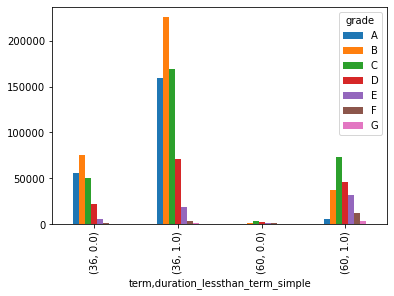

In [81]:
acc_sub_onlyfullypaid[['duration_lessthan_term_simple', 'grade', 'term']].groupby(['grade', 'term'])\
['duration_lessthan_term_simple'].value_counts().unstack('grade').plot(kind='bar')

# Question 6

## Bullet 1

In [82]:
acc['profitability'] = (acc['total_pymnt'] - acc['funded_amnt_inv'])/(acc['funded_amnt'])
acc['profitability']

0          0.228257
1          0.039662
2          0.135296
3         -0.101028
4          0.128894
             ...   
2260694   -0.343313
2260695   -0.374645
2260696   -0.377402
2260697   -0.718525
2260698   -0.312768
Name: profitability, Length: 2260668, dtype: float64

## Bullet 2

In [83]:
acc['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [84]:
acc_list_onlyfullypaid = list(acc[~acc['loan_status'].str.contains('Fully Paid', na=False)].index)

acc_onlyfullypaid = acc.drop(acc_list_onlyfullypaid)

acc_profit_onlyfullypaid = acc_onlyfullypaid[['profitability', 'grade', 'term', 'purpose', 'year']]

<AxesSubplot:xlabel='term'>

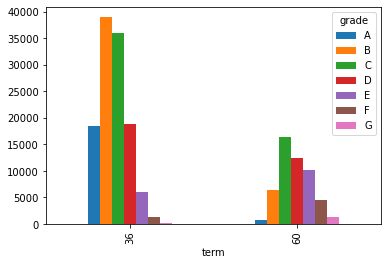

In [85]:
acc_profit_onlyfullypaid.groupby(['grade', 'term'])['profitability'].sum().unstack('grade').plot(kind='bar')

<AxesSubplot:xlabel='term'>

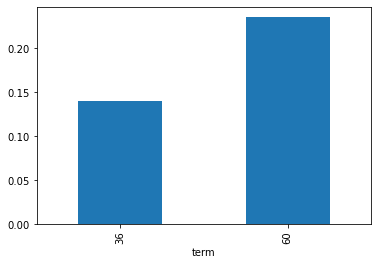

In [86]:
# Depicts the mean of the percentages

acc_profit_onlyfullypaid.groupby(['term'])['profitability'].mean().plot(kind='bar')

## Bullet 3

In [87]:
acc_list_onlydefault = list(acc[~acc['loan_status'].str.contains('Default', na=False)].index)

acc_onlydefault = acc.drop(acc_list_onlydefault)

acc_profit_onlydefault = acc_onlydefault[['profitability', 'grade', 'term', 'purpose', 'year']]

<AxesSubplot:xlabel='term'>

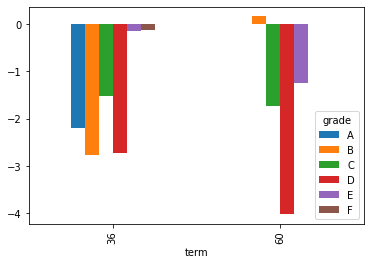

In [88]:
acc_profit_onlydefault.groupby(['grade', 'term'])['profitability'].sum().unstack('grade').plot(kind='bar')

<AxesSubplot:xlabel='term'>

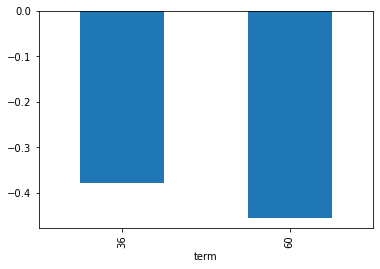

In [89]:
# Depicts the mean of the percentages

acc_profit_onlydefault.groupby(['term'])['profitability'].mean().plot(kind='bar')

## Bullet 4

In [90]:
acc_list_terminated = list(acc[~acc['loan_status'].str.contains('Default|Fully Paid|Charged Off', na=False)].index)

acc_terminated = acc.drop(acc_list_terminated)

acc_profit_terminated = acc_terminated[['profitability', 'grade', 'term', 'purpose', 'year']]

<AxesSubplot:xlabel='term'>

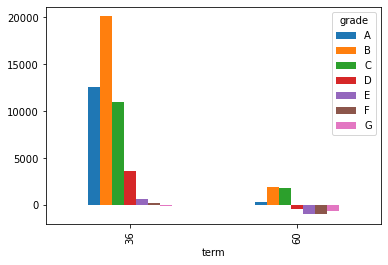

In [91]:
acc_profit_terminated.groupby(['grade', 'term'])['profitability'].sum().unstack('grade').plot(kind='bar')

<AxesSubplot:xlabel='term'>

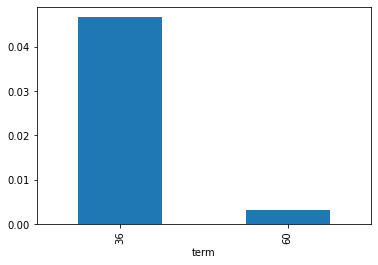

In [92]:
# Depicts the mean of the percentages

acc_profit_terminated.groupby(['term'])['profitability'].mean().plot(kind='bar')

## Bullet 5

In [93]:
acc_settlement = acc[acc['debt_settlement_flag']=='Y'][['profitability', 'grade', 'term']]

<AxesSubplot:xlabel='term'>

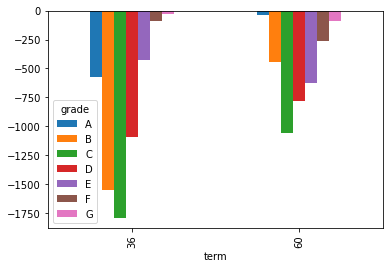

In [94]:
acc_settlement.groupby(['grade', 'term'])['profitability'].sum().unstack('grade').plot(kind='bar')

<AxesSubplot:xlabel='term'>

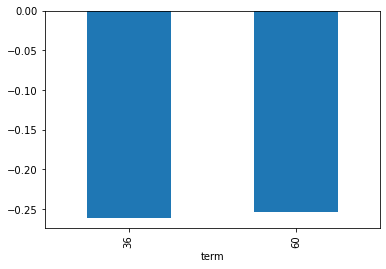

In [95]:
# Depicts the mean of the percentages

acc_settlement.groupby(['term'])['profitability'].mean().plot(kind='bar')

## Bullet 6

<AxesSubplot:xlabel='purpose'>

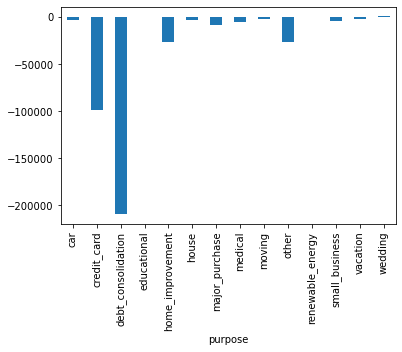

In [96]:
acc.groupby(['purpose'])['profitability'].sum().plot(kind='bar')

<AxesSubplot:xlabel='purpose'>

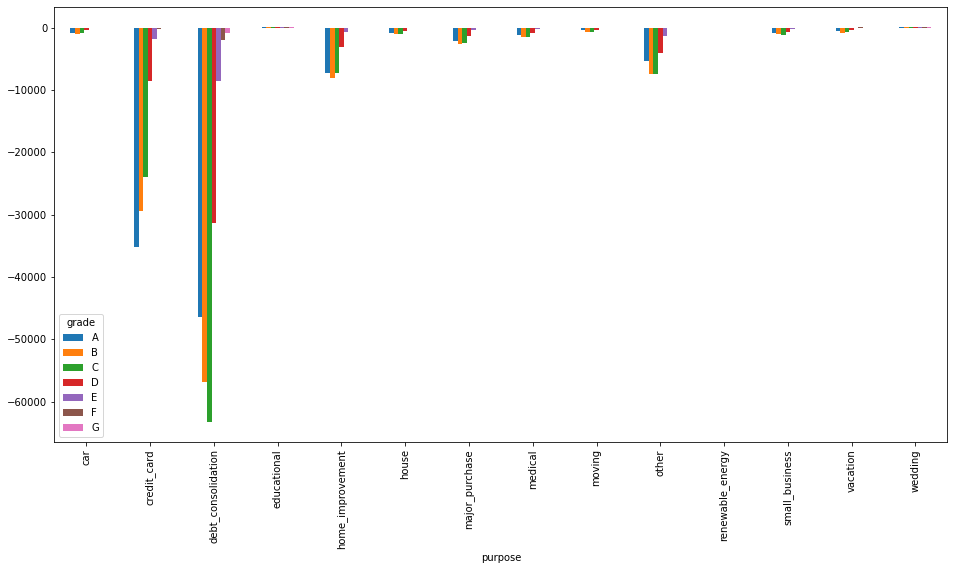

In [97]:
acc.groupby(['purpose', 'grade'])['profitability'].sum().unstack('grade').plot(kind='bar', figsize=(16, 8))

<AxesSubplot:xlabel='purpose'>

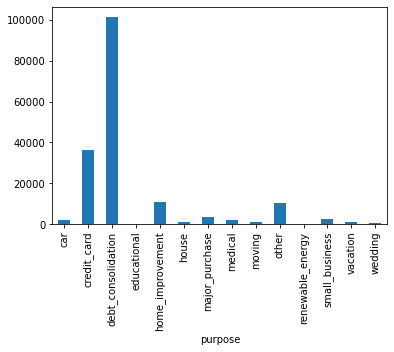

In [98]:
acc_profit_onlyfullypaid.groupby(['purpose'])['profitability'].sum().plot(kind='bar')

<AxesSubplot:xlabel='purpose'>

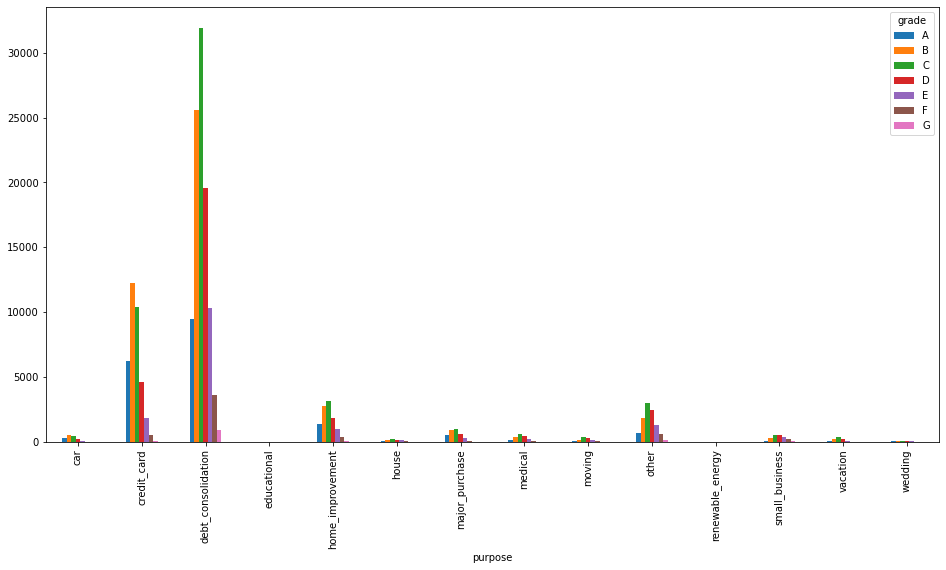

In [99]:
acc_profit_onlyfullypaid.groupby(['purpose', 'grade'])['profitability'].sum().unstack('grade').plot(kind='bar', figsize=(16, 8))

<AxesSubplot:xlabel='purpose'>

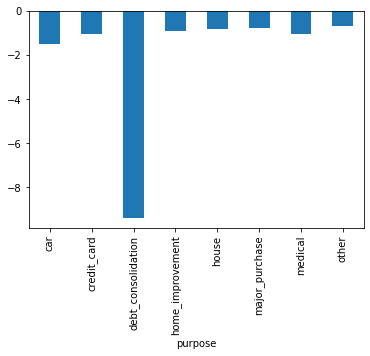

In [100]:
acc_profit_onlydefault.groupby(['purpose'])['profitability'].sum().plot(kind='bar')

<AxesSubplot:xlabel='purpose'>

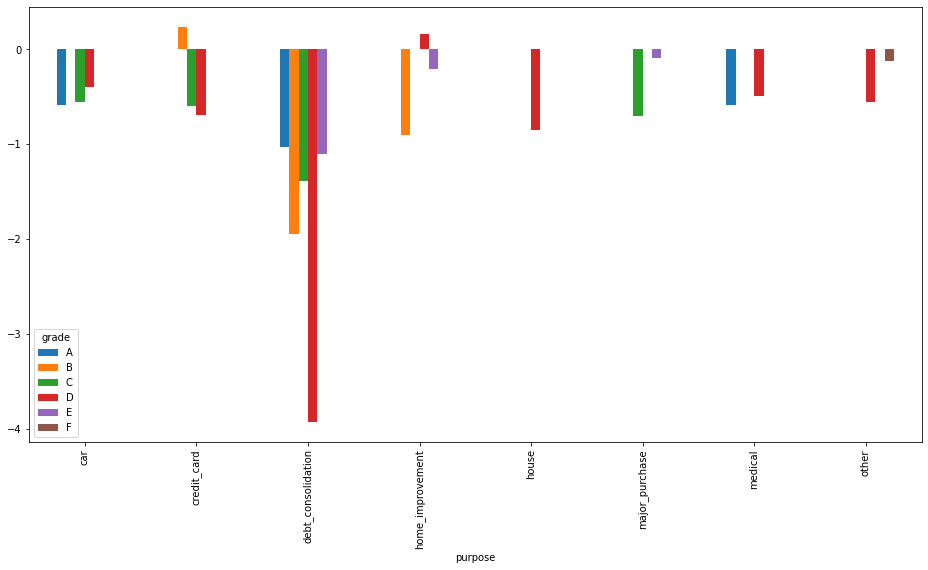

In [101]:
acc_profit_onlydefault.groupby(['purpose', 'grade'])['profitability'].sum().unstack('grade').plot(kind='bar', figsize=(16, 8))

<AxesSubplot:xlabel='purpose'>

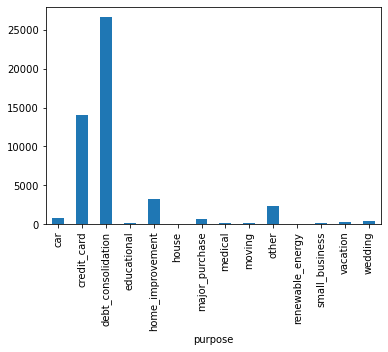

In [102]:
acc_profit_terminated.groupby(['purpose'])['profitability'].sum().plot(kind='bar')

<AxesSubplot:xlabel='purpose'>

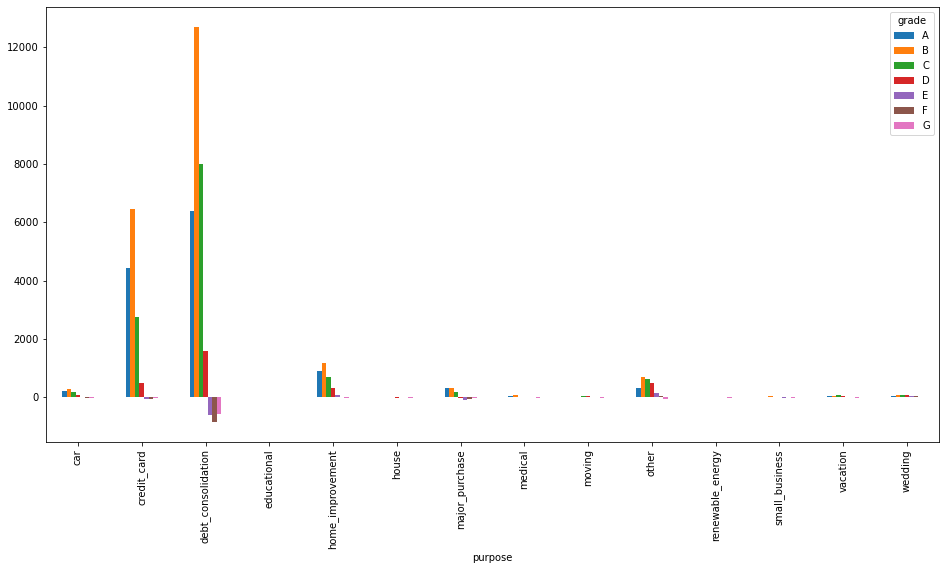

In [103]:
acc_profit_terminated.groupby(['purpose', 'grade'])['profitability'].sum().unstack('grade').plot(kind='bar', figsize=(16, 8))

## Bullet 7

<AxesSubplot:xlabel='year'>

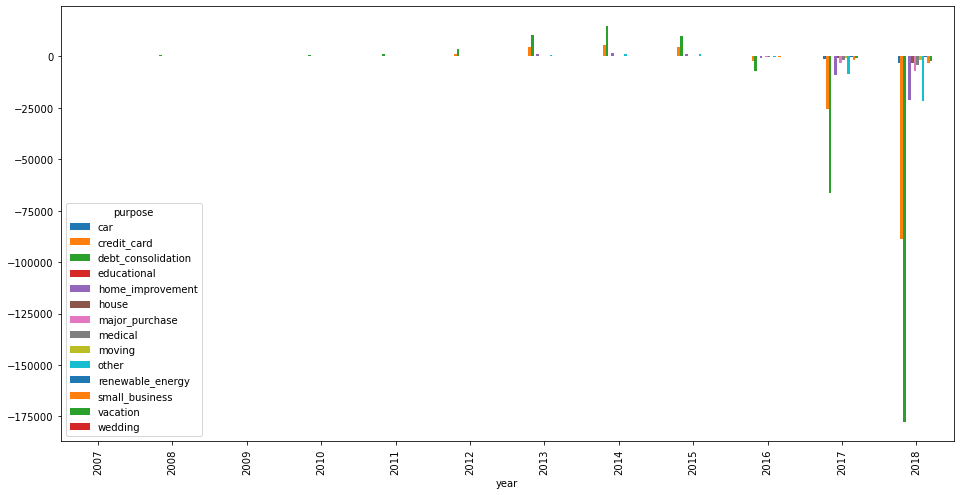

In [104]:
acc.groupby(['purpose', 'year'])['profitability'].sum().unstack('purpose').plot(kind='bar', figsize=(16, 8))

<AxesSubplot:xlabel='year'>

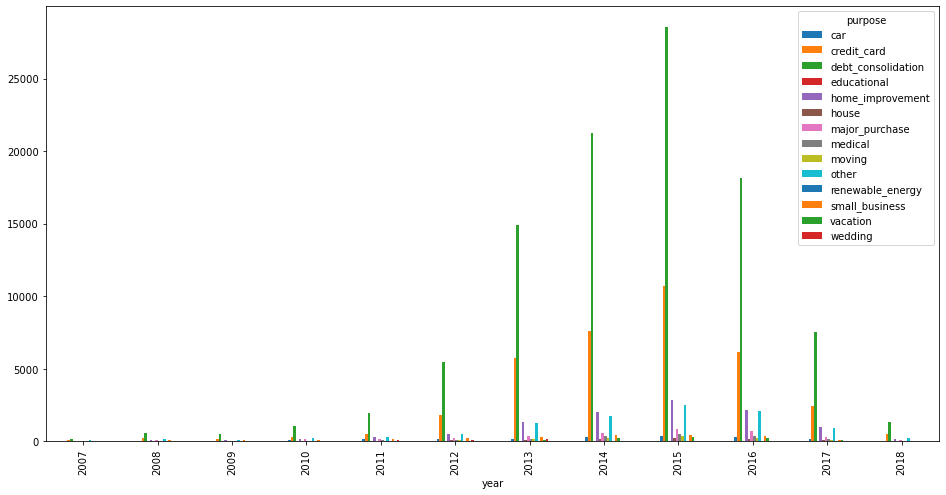

In [105]:
acc_profit_onlyfullypaid.groupby(['purpose', 'year'])['profitability'].sum().unstack('purpose').plot(kind='bar', figsize=(16, 8))

<AxesSubplot:xlabel='year'>

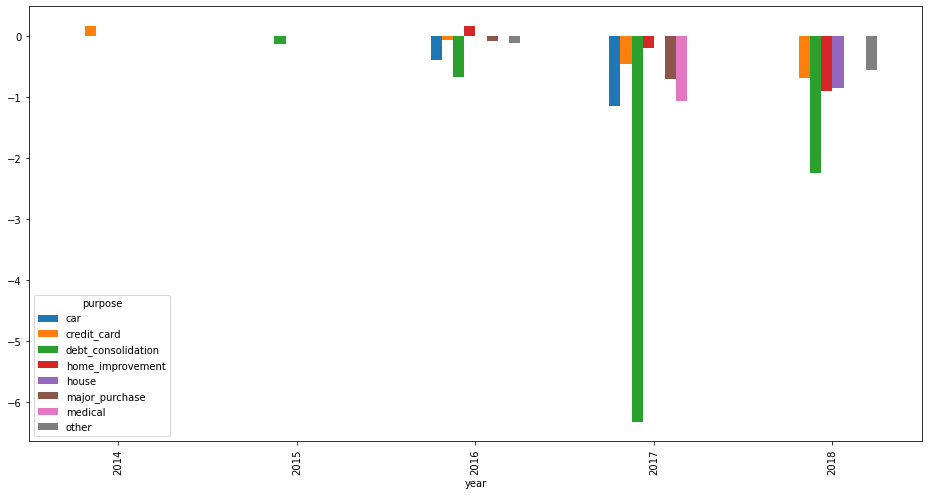

In [106]:
acc_profit_onlydefault.groupby(['purpose', 'year'])['profitability'].sum().unstack('purpose').plot(kind='bar', figsize=(16, 8))

<AxesSubplot:xlabel='year'>

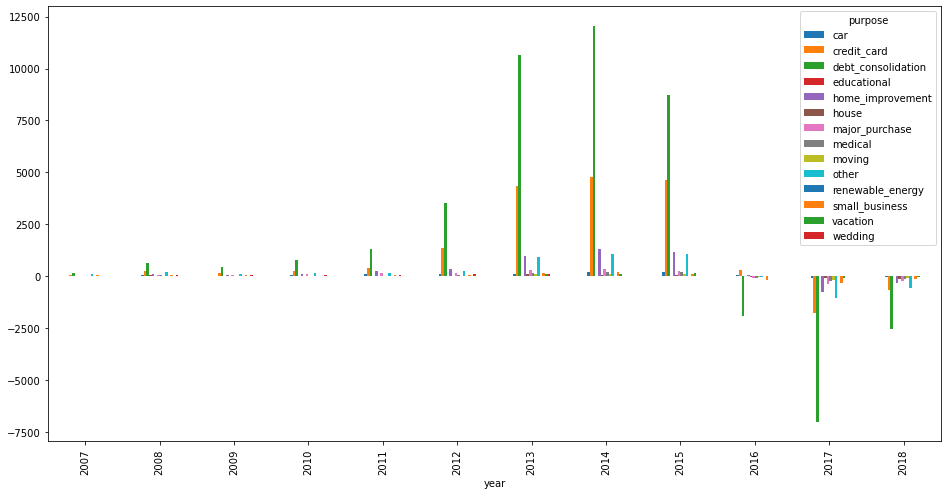

In [107]:
acc_profit_terminated.groupby(['purpose', 'year'])\
['profitability'].sum().unstack('purpose').plot(kind='bar', figsize=(16, 8))

## Bullet 8

<AxesSubplot:xlabel='term'>

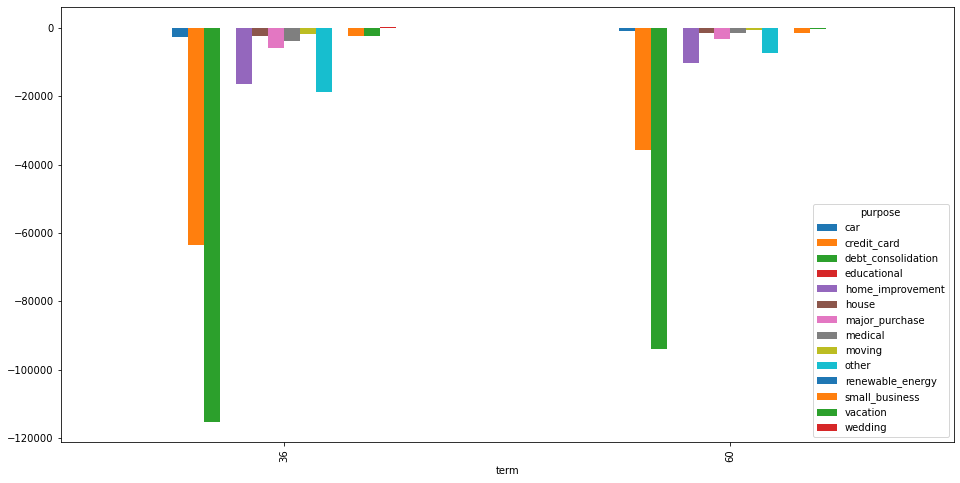

In [108]:
acc.groupby(['purpose', 'term'])['profitability'].sum().unstack('purpose').plot(kind='bar',
                                                                                figsize=(16, 8))

# Question 7

## Bullet 1

In [109]:
acc['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [110]:
acc['survival'] = np.where(acc['loan_status'].str.contains('Fully Paid|Current|Late', na=False), True, False)

acc['survival']

0           True
1           True
2           True
3           True
4           True
           ...  
2260694     True
2260695     True
2260696     True
2260697    False
2260698     True
Name: survival, Length: 2260668, dtype: bool

In [111]:
acc['actual_duration_days'] = (pd.DatetimeIndex(acc['last_pymnt_d']) - pd.DatetimeIndex(acc['issue_d'])).days

acc['actual_duration_days']

0          1127.0
1           183.0
2           548.0
3          1158.0
4           213.0
            ...  
2260694     881.0
2260695     881.0
2260696     881.0
2260697     365.0
2260698     881.0
Name: actual_duration_days, Length: 2260668, dtype: float64

In [112]:
acc.loc[acc['actual_duration_days'].isnull(), ['actual_duration_days']]=0

Text(0.5, 0, 'time $t$')

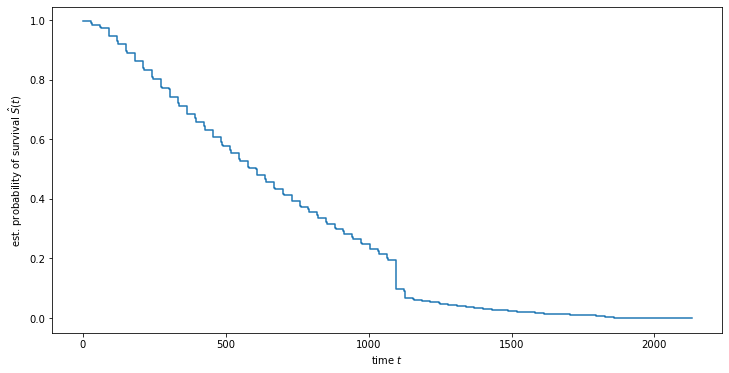

In [113]:
# https://scikit-survival.readthedocs.io/en/stable/user_guide/00-introduction.html

from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(acc['survival'], acc['actual_duration_days'])

plt.figure(figsize=(12,6))

plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

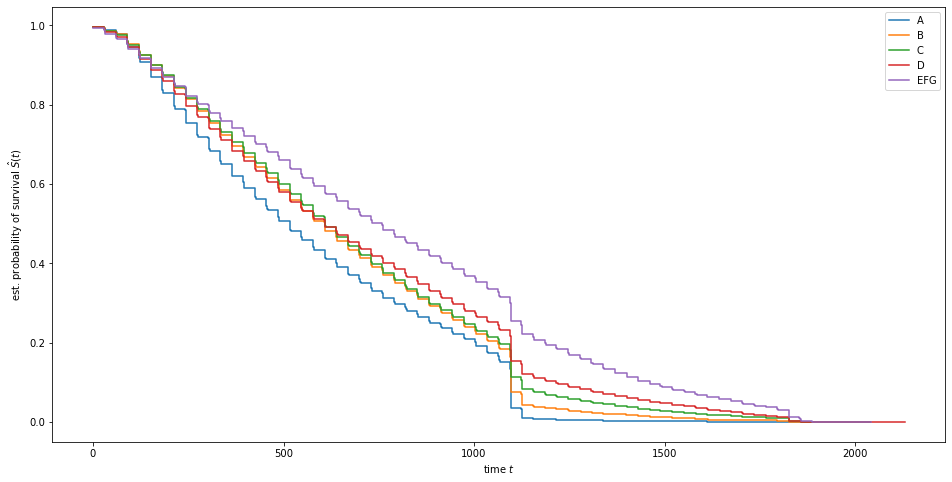

In [114]:
acc_list_grade_a = list(acc[~acc['grade'].str.contains('A', na=False)].index)
acc_grade_a = acc.drop(acc_list_grade_a)

acc_list_grade_b = list(acc[~acc['grade'].str.contains('B', na=False)].index)
acc_grade_b = acc.drop(acc_list_grade_b)

acc_list_grade_c = list(acc[~acc['grade'].str.contains('C', na=False)].index)
acc_grade_c = acc.drop(acc_list_grade_c)

acc_list_grade_d = list(acc[~acc['grade'].str.contains('D', na=False)].index)
acc_grade_d = acc.drop(acc_list_grade_d)

acc_list_grade_efg = list(acc[~acc['grade'].str.contains('E|F|G', na=False)].index)
acc_grade_efg = acc.drop(acc_list_grade_efg)

plt.figure(figsize=(16, 8))

time_a, survival_prob_a = kaplan_meier_estimator(acc_grade_a['survival'], acc_grade_a['actual_duration_days'])
time_b, survival_prob_b = kaplan_meier_estimator(acc_grade_b['survival'], acc_grade_b['actual_duration_days'])
time_c, survival_prob_c = kaplan_meier_estimator(acc_grade_c['survival'], acc_grade_c['actual_duration_days'])
time_d, survival_prob_d = kaplan_meier_estimator(acc_grade_d['survival'], acc_grade_d['actual_duration_days'])
time_efg, survival_prob_efg = kaplan_meier_estimator(acc_grade_efg['survival'], acc_grade_efg['actual_duration_days'])

plt.step(time_a, survival_prob_a, where="post")
plt.step(time_b, survival_prob_b, where="post")
plt.step(time_c, survival_prob_c, where="post")
plt.step(time_d, survival_prob_d, where="post")
plt.step(time_efg, survival_prob_efg, where="post")

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(['A', 'B', 'C', 'D', 'EFG'])

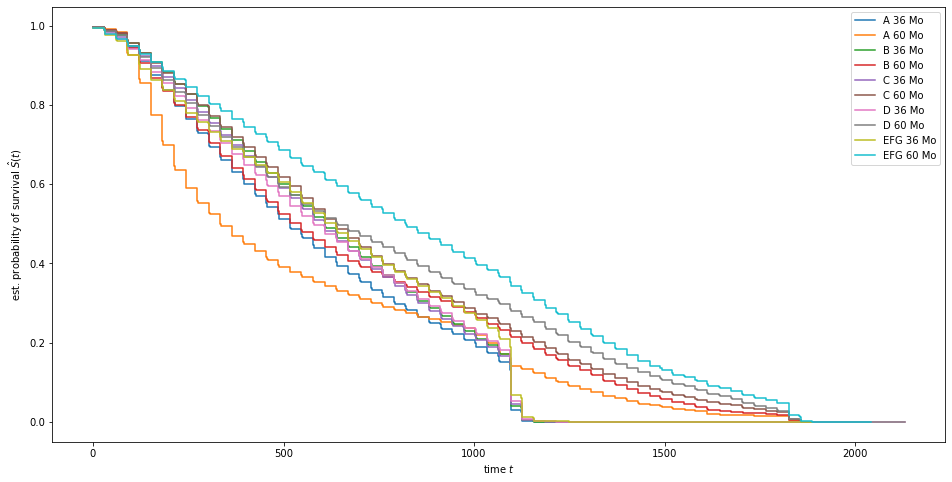

In [115]:
plt.figure(figsize=(16, 8))

acc_a_term_36 = acc_grade_a[acc_grade_a['term']==36]
acc_a_term_60 = acc_grade_a[acc_grade_a['term']==60]

acc_b_term_36 = acc_grade_b[acc_grade_b['term']==36]
acc_b_term_60 = acc_grade_b[acc_grade_b['term']==60]

acc_c_term_36 = acc_grade_c[acc_grade_c['term']==36]
acc_c_term_60 = acc_grade_c[acc_grade_c['term']==60]

acc_d_term_36 = acc_grade_d[acc_grade_d['term']==36]
acc_d_term_60 = acc_grade_d[acc_grade_d['term']==60]

acc_efg_term_36 = acc_grade_efg[acc_grade_efg['term']==36]
acc_efg_term_60 = acc_grade_efg[acc_grade_efg['term']==60]


time_a_36, survival_prob_a_36 = kaplan_meier_estimator(acc_a_term_36['survival'], acc_a_term_36['actual_duration_days'])
time_a_60, survival_prob_a_60 = kaplan_meier_estimator(acc_a_term_60['survival'], acc_a_term_60['actual_duration_days'])

time_b_36, survival_prob_b_36 = kaplan_meier_estimator(acc_b_term_36['survival'], acc_b_term_36['actual_duration_days'])
time_b_60, survival_prob_b_60 = kaplan_meier_estimator(acc_b_term_60['survival'], acc_b_term_60['actual_duration_days'])

time_c_36, survival_prob_c_36 = kaplan_meier_estimator(acc_c_term_36['survival'], acc_c_term_36['actual_duration_days'])
time_c_60, survival_prob_c_60 = kaplan_meier_estimator(acc_c_term_60['survival'], acc_c_term_60['actual_duration_days'])

time_d_36, survival_prob_d_36 = kaplan_meier_estimator(acc_d_term_36['survival'], acc_d_term_36['actual_duration_days'])
time_d_60, survival_prob_d_60 = kaplan_meier_estimator(acc_d_term_60['survival'], acc_d_term_60['actual_duration_days'])

time_efg_36, survival_prob_efg_36 = kaplan_meier_estimator(acc_efg_term_36['survival'], acc_efg_term_36['actual_duration_days'])
time_efg_60, survival_prob_efg_60 = kaplan_meier_estimator(acc_efg_term_60['survival'], acc_efg_term_60['actual_duration_days'])


plt.step(time_a_36, survival_prob_a_36, where="post")
plt.step(time_a_60, survival_prob_a_60, where="post")

plt.step(time_b_36, survival_prob_b_36, where="post")
plt.step(time_b_60, survival_prob_b_60, where="post")

plt.step(time_c_36, survival_prob_c_36, where="post")
plt.step(time_c_60, survival_prob_c_60, where="post")

plt.step(time_d_36, survival_prob_d_36, where="post")
plt.step(time_d_60, survival_prob_d_60, where="post")

plt.step(time_efg_36, survival_prob_efg_36, where="post")
plt.step(time_efg_60, survival_prob_efg_60, where="post")

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(['A 36 Mo', 'A 60 Mo',
            'B 36 Mo', 'B 60 Mo', 
            'C 36 Mo', 'C 60 Mo', 
            'D 36 Mo', 'D 60 Mo', 
            'EFG 36 Mo', 'EFG 60 Mo'])

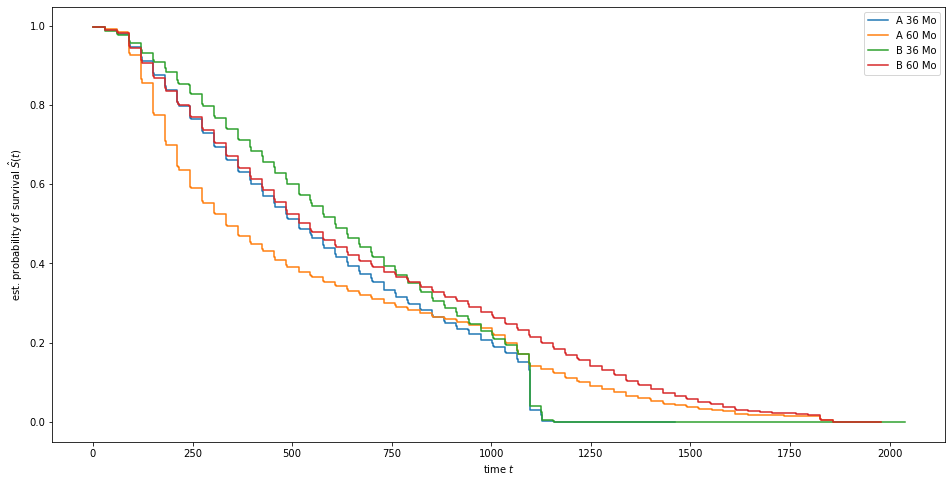

In [116]:
plt.figure(figsize=(16, 8))

acc_a_term_36 = acc_grade_a[acc_grade_a['term']==36]
acc_a_term_60 = acc_grade_a[acc_grade_a['term']==60]

acc_b_term_36 = acc_grade_b[acc_grade_b['term']==36]
acc_b_term_60 = acc_grade_b[acc_grade_b['term']==60]


time_a_36, survival_prob_a_36 = kaplan_meier_estimator(acc_a_term_36['survival'], acc_a_term_36['actual_duration_days'])
time_a_60, survival_prob_a_60 = kaplan_meier_estimator(acc_a_term_60['survival'], acc_a_term_60['actual_duration_days'])

time_b_36, survival_prob_b_36 = kaplan_meier_estimator(acc_b_term_36['survival'], acc_b_term_36['actual_duration_days'])
time_b_60, survival_prob_b_60 = kaplan_meier_estimator(acc_b_term_60['survival'], acc_b_term_60['actual_duration_days'])


plt.step(time_a_36, survival_prob_a_36, where="post")
plt.step(time_a_60, survival_prob_a_60, where="post")

plt.step(time_b_36, survival_prob_b_36, where="post")
plt.step(time_b_60, survival_prob_b_60, where="post")

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(['A 36 Mo', 'A 60 Mo',
            'B 36 Mo', 'B 60 Mo'])

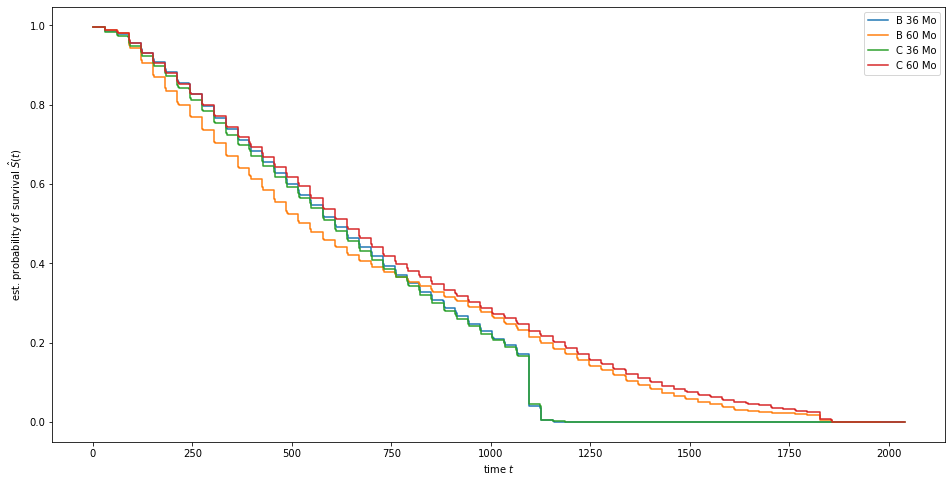

In [117]:
plt.figure(figsize=(16, 8))

acc_b_term_36 = acc_grade_b[acc_grade_b['term']==36]
acc_b_term_60 = acc_grade_b[acc_grade_b['term']==60]

acc_c_term_36 = acc_grade_c[acc_grade_c['term']==36]
acc_c_term_60 = acc_grade_c[acc_grade_c['term']==60]


time_b_36, survival_prob_b_36 = kaplan_meier_estimator(acc_b_term_36['survival'], acc_b_term_36['actual_duration_days'])
time_b_60, survival_prob_b_60 = kaplan_meier_estimator(acc_b_term_60['survival'], acc_b_term_60['actual_duration_days'])

time_c_36, survival_prob_c_36 = kaplan_meier_estimator(acc_c_term_36['survival'], acc_c_term_36['actual_duration_days'])
time_c_60, survival_prob_c_60 = kaplan_meier_estimator(acc_c_term_60['survival'], acc_c_term_60['actual_duration_days'])


plt.step(time_b_36, survival_prob_b_36, where="post")
plt.step(time_b_60, survival_prob_b_60, where="post")

plt.step(time_c_36, survival_prob_c_36, where="post")
plt.step(time_c_60, survival_prob_c_60, where="post")


plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(['B 36 Mo', 'B 60 Mo', 
            'C 36 Mo', 'C 60 Mo'])

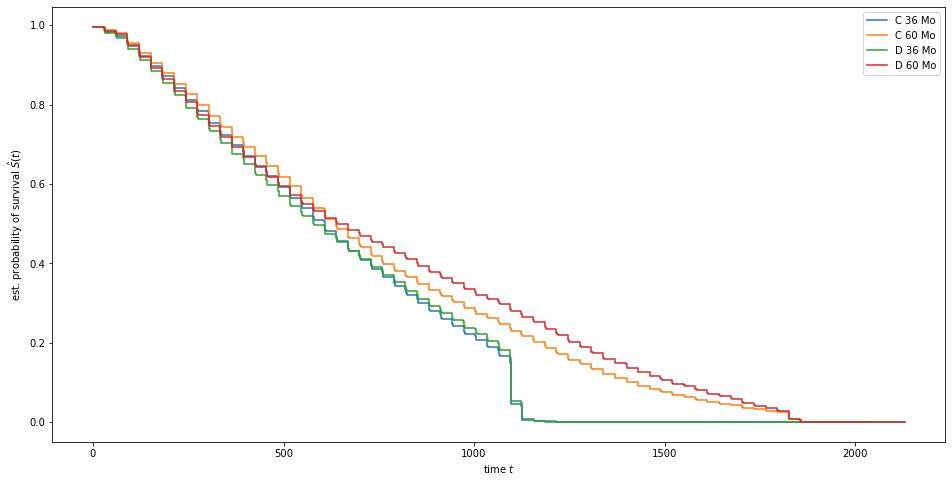

In [118]:
plt.figure(figsize=(16, 8))

acc_c_term_36 = acc_grade_c[acc_grade_c['term']==36]
acc_c_term_60 = acc_grade_c[acc_grade_c['term']==60]

acc_d_term_36 = acc_grade_d[acc_grade_d['term']==36]
acc_d_term_60 = acc_grade_d[acc_grade_d['term']==60]


time_c_36, survival_prob_c_36 = kaplan_meier_estimator(acc_c_term_36['survival'], acc_c_term_36['actual_duration_days'])
time_c_60, survival_prob_c_60 = kaplan_meier_estimator(acc_c_term_60['survival'], acc_c_term_60['actual_duration_days'])

time_d_36, survival_prob_d_36 = kaplan_meier_estimator(acc_d_term_36['survival'], acc_d_term_36['actual_duration_days'])
time_d_60, survival_prob_d_60 = kaplan_meier_estimator(acc_d_term_60['survival'], acc_d_term_60['actual_duration_days'])


plt.step(time_c_36, survival_prob_c_36, where="post")
plt.step(time_c_60, survival_prob_c_60, where="post")

plt.step(time_d_36, survival_prob_d_36, where="post")
plt.step(time_d_60, survival_prob_d_60, where="post")

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(['C 36 Mo', 'C 60 Mo', 
            'D 36 Mo', 'D 60 Mo'])

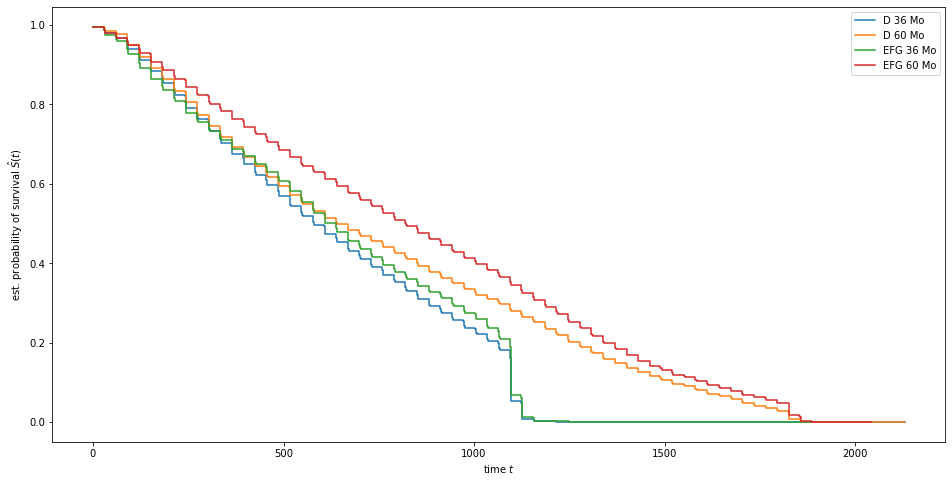

In [119]:
plt.figure(figsize=(16, 8))


acc_d_term_36 = acc_grade_d[acc_grade_d['term']==36]
acc_d_term_60 = acc_grade_d[acc_grade_d['term']==60]

acc_efg_term_36 = acc_grade_efg[acc_grade_efg['term']==36]
acc_efg_term_60 = acc_grade_efg[acc_grade_efg['term']==60]


time_d_36, survival_prob_d_36 = kaplan_meier_estimator(acc_d_term_36['survival'], acc_d_term_36['actual_duration_days'])
time_d_60, survival_prob_d_60 = kaplan_meier_estimator(acc_d_term_60['survival'], acc_d_term_60['actual_duration_days'])

time_efg_36, survival_prob_efg_36 = kaplan_meier_estimator(acc_efg_term_36['survival'], acc_efg_term_36['actual_duration_days'])
time_efg_60, survival_prob_efg_60 = kaplan_meier_estimator(acc_efg_term_60['survival'], acc_efg_term_60['actual_duration_days'])


plt.step(time_d_36, survival_prob_d_36, where="post")
plt.step(time_d_60, survival_prob_d_60, where="post")

plt.step(time_efg_36, survival_prob_efg_36, where="post")
plt.step(time_efg_60, survival_prob_efg_60, where="post")

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(['D 36 Mo', 'D 60 Mo', 
            'EFG 36 Mo', 'EFG 60 Mo'])

## Bullet 2

In [120]:
acc['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [121]:
acc_list_onlydefault = list(acc[~acc['loan_status'].str.contains('Default|Charged Off', na=False)].index)

acc_onlydefault = acc.drop(acc_list_onlydefault)

acc_surv_onlydefault = acc_onlydefault[['survival', 'actual_duration_days', 'grade', 'loan_status']]

In [122]:
acc_surv_onlydefault

,survival,actual_duration_days,grade,loan_status
13,False,517.0,E,Charged Off
25,False,487.0,C,Charged Off
30,False,1066.0,C,Charged Off
31,False,213.0,F,Charged Off
33,False,793.0,C,Charged Off
...,...,...,...,...
2260673,False,61.0,C,Charged Off
2260677,False,730.0,C,Charged Off
2260685,False,92.0,C,Charged Off
2260691,False,151.0,C,Charged Off


In [123]:
acc_list_grade_a_def = list(acc_surv_onlydefault[~acc_surv_onlydefault['grade'].str.contains('A', na=False)].index)

acc_list_grade_a_def

[13,
 25,
 30,
 31,
 33,
 41,
 60,
 63,
 65,
 68,
 78,
 79,
 83,
 84,
 99,
 102,
 105,
 118,
 128,
 132,
 143,
 144,
 146,
 149,
 158,
 171,
 174,
 177,
 181,
 184,
 205,
 218,
 231,
 237,
 246,
 247,
 248,
 249,
 276,
 277,
 291,
 297,
 308,
 312,
 320,
 321,
 331,
 335,
 342,
 350,
 355,
 358,
 360,
 361,
 365,
 370,
 377,
 382,
 383,
 384,
 393,
 419,
 427,
 436,
 442,
 443,
 449,
 456,
 489,
 502,
 505,
 507,
 508,
 518,
 542,
 547,
 552,
 559,
 561,
 564,
 569,
 575,
 576,
 580,
 583,
 589,
 606,
 609,
 611,
 620,
 621,
 625,
 639,
 654,
 664,
 697,
 699,
 706,
 709,
 714,
 716,
 717,
 724,
 730,
 737,
 748,
 759,
 766,
 767,
 783,
 795,
 803,
 810,
 811,
 831,
 832,
 836,
 837,
 845,
 847,
 856,
 861,
 873,
 878,
 884,
 898,
 910,
 922,
 925,
 946,
 949,
 950,
 954,
 956,
 960,
 962,
 975,
 988,
 990,
 995,
 1022,
 1023,
 1028,
 1035,
 1045,
 1058,
 1065,
 1068,
 1071,
 1079,
 1085,
 1094,
 1123,
 1125,
 1138,
 1159,
 1160,
 1161,
 1172,
 1177,
 1196,
 1205,
 1207,
 1208,
 1212,


In [124]:
acc_grade_a_surv_def = acc_surv_onlydefault.drop(acc_list_grade_a_def)

acc_grade_a_surv_def

,survival,actual_duration_days,grade,loan_status
152,False,548.0,A,Charged Off
160,False,762.0,A,Charged Off
217,False,882.0,A,Charged Off
476,False,821.0,A,Charged Off
889,False,882.0,A,Charged Off
...,...,...,...,...
2259383,False,730.0,A,Charged Off
2259412,False,638.0,A,Charged Off
2259525,False,608.0,A,Charged Off
2260080,False,304.0,A,Charged Off


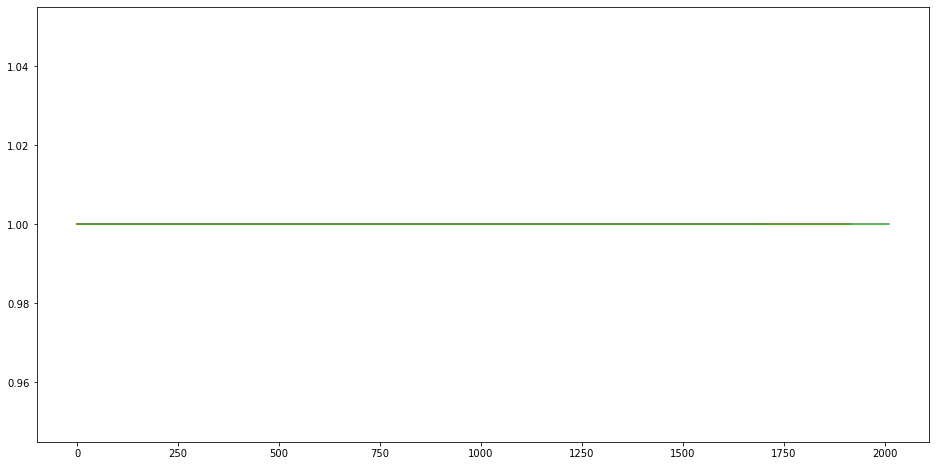

In [125]:
acc_list_grade_a_def = list(acc_surv_onlydefault[~acc_surv_onlydefault['grade'].str.contains('A', na=False)].index)
acc_grade_a_surv_def = acc_surv_onlydefault.drop(acc_list_grade_a_def)

acc_list_grade_b_def = list(acc_surv_onlydefault[~acc_surv_onlydefault['grade'].str.contains('B', na=False)].index)
acc_grade_b_surv_def = acc_surv_onlydefault.drop(acc_list_grade_b_def)

acc_list_grade_c_def = list(acc_surv_onlydefault[~acc_surv_onlydefault['grade'].str.contains('C', na=False)].index)
acc_grade_c_surv_def = acc_surv_onlydefault.drop(acc_list_grade_c_def)

plt.figure(figsize=(16, 8))

time_a_def, survival_prob_a_def = kaplan_meier_estimator(acc_grade_a_surv_def['survival'],
                                                         acc_grade_a_surv_def['actual_duration_days'])
time_b_def, survival_prob_b_def = kaplan_meier_estimator(acc_grade_b_surv_def['survival'],
                                                         acc_grade_b_surv_def['actual_duration_days'])
time_c_def, survival_prob_c_def = kaplan_meier_estimator(acc_grade_c_surv_def['survival'],
                                                         acc_grade_c_surv_def['actual_duration_days'])

plt.step(time_a_def, survival_prob_a_def, where="post")
plt.step(time_b_def, survival_prob_b_def, where="post")
plt.step(time_c_def, survival_prob_c_def, where="post")